In [71]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import os
import math
import re
import sys

In [72]:
names = names = ('Image', 'Centre')
det_circ = pd.read_csv(r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Repository for data and scripts\Glenn\Github\Master_thesis\Data\First_field_data\Fit_circle_center2.csv", sep=",", names=names, skiprows=1)

det_circ

,Image,Centre
0,IMG_13029_2024-02-05_10-24-31.jpg,"(164, 188)"
1,IMG_13030_2024-02-05_10-29-39.jpg,"(163, 189)"
2,IMG_13031_2024-02-05_10-34-47.jpg,"(167, 195)"
3,IMG_13032_2024-02-05_10-39-55.jpg,"(167, 196)"
4,IMG_13033_2024-02-05_10-45-03.jpg,"(164, 194)"
...,...,...
75,IMG_13352_2024-02-06_14-02-41.jpg,"(171, 184)"
76,IMG_13353_2024-02-06_14-07-49.jpg,"(170, 192)"
77,IMG_13354_2024-02-06_14-12-57.jpg,"(170, 189)"
78,IMG_13355_2024-02-06_14-18-05.jpg,"(170, 192)"


In [73]:
# Extracting x_centre[px] and y_centre[px]
det_circ['x_centre[px]'] = det_circ['Centre'].apply(lambda x: int(x[1:4]))
det_circ['y_centre[px]'] = det_circ['Centre'].apply(lambda x: int(x[6:9]))

# Extracting datetime using a regular expression
det_circ['datetime'] = det_circ['Image'].apply(lambda x: re.search(r'_(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})\.jpg', x).group(1))

det_circ


,Image,Centre,x_centre[px],y_centre[px],datetime
0,IMG_13029_2024-02-05_10-24-31.jpg,"(164, 188)",164,188,2024-02-05_10-24-31
1,IMG_13030_2024-02-05_10-29-39.jpg,"(163, 189)",163,189,2024-02-05_10-29-39
2,IMG_13031_2024-02-05_10-34-47.jpg,"(167, 195)",167,195,2024-02-05_10-34-47
3,IMG_13032_2024-02-05_10-39-55.jpg,"(167, 196)",167,196,2024-02-05_10-39-55
4,IMG_13033_2024-02-05_10-45-03.jpg,"(164, 194)",164,194,2024-02-05_10-45-03
...,...,...,...,...,...
75,IMG_13352_2024-02-06_14-02-41.jpg,"(171, 184)",171,184,2024-02-06_14-02-41
76,IMG_13353_2024-02-06_14-07-49.jpg,"(170, 192)",170,192,2024-02-06_14-07-49
77,IMG_13354_2024-02-06_14-12-57.jpg,"(170, 189)",170,189,2024-02-06_14-12-57
78,IMG_13355_2024-02-06_14-18-05.jpg,"(170, 192)",170,192,2024-02-06_14-18-05


In [74]:
ratio = 0.43709693

det_circ['x_centre[mm]'] = det_circ['x_centre[px]']*ratio
det_circ['y_centre[mm]'] = det_circ['y_centre[px]']*ratio
det_circ=det_circ[['Image','datetime','x_centre[px]','y_centre[px]','x_centre[mm]','y_centre[mm]']]
det_circ.sort_values(by ='Image')

,Image,datetime,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm]
0,IMG_13029_2024-02-05_10-24-31.jpg,2024-02-05_10-24-31,164,188,71.683897,82.174223
1,IMG_13030_2024-02-05_10-29-39.jpg,2024-02-05_10-29-39,163,189,71.246800,82.611320
2,IMG_13031_2024-02-05_10-34-47.jpg,2024-02-05_10-34-47,167,195,72.995187,85.233901
3,IMG_13032_2024-02-05_10-39-55.jpg,2024-02-05_10-39-55,167,196,72.995187,85.670998
4,IMG_13033_2024-02-05_10-45-03.jpg,2024-02-05_10-45-03,164,194,71.683897,84.796804
...,...,...,...,...,...,...
75,IMG_13352_2024-02-06_14-02-41.jpg,2024-02-06_14-02-41,171,184,74.743575,80.425835
76,IMG_13353_2024-02-06_14-07-49.jpg,2024-02-06_14-07-49,170,192,74.306478,83.922611
77,IMG_13354_2024-02-06_14-12-57.jpg,2024-02-06_14-12-57,170,189,74.306478,82.611320
78,IMG_13355_2024-02-06_14-18-05.jpg,2024-02-06_14-18-05,170,192,74.306478,83.922611


In [75]:
mean_x = det_circ['x_centre[mm]'].mean()
mean_y = det_circ['y_centre[mm]'].mean()
print(mean_x, mean_y)

71.470811766625 82.55668265375


In [76]:
#det_circ['datetime'] = det_circ['datetime'].str.replace('_', ' ').apply(lambda x: x[:10] + x[10:].replace('-', ':'))
det_circ['datetime'] = det_circ['datetime'].str.replace('_', ' ').str.replace(r'(\d{2})-(\d{2})-(\d{2})$', r'\1:\2:\3')

det_circ

c:\Users\kwayi\anaconda3\envs\hs_nb_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\Users\kwayi\anaconda3\envs\hs_nb_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Image,datetime,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm]
0,IMG_13029_2024-02-05_10-24-31.jpg,2024-02-05 10:24:31,164,188,71.683897,82.174223
1,IMG_13030_2024-02-05_10-29-39.jpg,2024-02-05 10:29:39,163,189,71.246800,82.611320
2,IMG_13031_2024-02-05_10-34-47.jpg,2024-02-05 10:34:47,167,195,72.995187,85.233901
3,IMG_13032_2024-02-05_10-39-55.jpg,2024-02-05 10:39:55,167,196,72.995187,85.670998
4,IMG_13033_2024-02-05_10-45-03.jpg,2024-02-05 10:45:03,164,194,71.683897,84.796804
...,...,...,...,...,...,...
75,IMG_13352_2024-02-06_14-02-41.jpg,2024-02-06 14:02:41,171,184,74.743575,80.425835
76,IMG_13353_2024-02-06_14-07-49.jpg,2024-02-06 14:07:49,170,192,74.306478,83.922611
77,IMG_13354_2024-02-06_14-12-57.jpg,2024-02-06 14:12:57,170,189,74.306478,82.611320
78,IMG_13355_2024-02-06_14-18-05.jpg,2024-02-06 14:18:05,170,192,74.306478,83.922611


In [77]:
det_circ['rel_diff_x[mm]']=  det_circ['x_centre[mm]'] - mean_x

det_circ['rel_diff_y[mm]']=  det_circ['y_centre[mm]'] - mean_y




#det_circ.to_excel("Right_Fit_circle_centre_mm4.xlsx")
det_circ

,Image,datetime,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm],rel_diff_x[mm],rel_diff_y[mm]
0,IMG_13029_2024-02-05_10-24-31.jpg,2024-02-05 10:24:31,164,188,71.683897,82.174223,0.213085,-0.382460
1,IMG_13030_2024-02-05_10-29-39.jpg,2024-02-05 10:29:39,163,189,71.246800,82.611320,-0.224012,0.054637
2,IMG_13031_2024-02-05_10-34-47.jpg,2024-02-05 10:34:47,167,195,72.995187,85.233901,1.524376,2.677219
3,IMG_13032_2024-02-05_10-39-55.jpg,2024-02-05 10:39:55,167,196,72.995187,85.670998,1.524376,3.114316
4,IMG_13033_2024-02-05_10-45-03.jpg,2024-02-05 10:45:03,164,194,71.683897,84.796804,0.213085,2.240122
...,...,...,...,...,...,...,...,...
75,IMG_13352_2024-02-06_14-02-41.jpg,2024-02-06 14:02:41,171,184,74.743575,80.425835,3.272763,-2.130848
76,IMG_13353_2024-02-06_14-07-49.jpg,2024-02-06 14:07:49,170,192,74.306478,83.922611,2.835666,1.365928
77,IMG_13354_2024-02-06_14-12-57.jpg,2024-02-06 14:12:57,170,189,74.306478,82.611320,2.835666,0.054637
78,IMG_13355_2024-02-06_14-18-05.jpg,2024-02-06 14:18:05,170,192,74.306478,83.922611,2.835666,1.365928


In [48]:

#det_circ['rel_diff_x[mm]']
#det_circ['rel_diff_y[mm]'] 
det_circ

,Image,datetime,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm],rel_diff_x[mm],rel_diff_y[mm]
0,IMG_13029_2024-02-05_10-24-31.jpg,2024-02-05_10-24-31,164,188,71.683897,82.174223,0.213085,-0.382460
1,IMG_13030_2024-02-05_10-29-39.jpg,2024-02-05_10-29-39,163,189,71.246800,82.611320,-0.224012,0.054637
2,IMG_13031_2024-02-05_10-34-47.jpg,2024-02-05_10-34-47,167,195,72.995187,85.233901,1.524376,2.677219
3,IMG_13032_2024-02-05_10-39-55.jpg,2024-02-05_10-39-55,167,196,72.995187,85.670998,1.524376,3.114316
4,IMG_13033_2024-02-05_10-45-03.jpg,2024-02-05_10-45-03,164,194,71.683897,84.796804,0.213085,2.240122
...,...,...,...,...,...,...,...,...
75,IMG_13352_2024-02-06_14-02-41.jpg,2024-02-06_14-02-41,171,184,74.743575,80.425835,3.272763,-2.130848
76,IMG_13353_2024-02-06_14-07-49.jpg,2024-02-06_14-07-49,170,192,74.306478,83.922611,2.835666,1.365928
77,IMG_13354_2024-02-06_14-12-57.jpg,2024-02-06_14-12-57,170,189,74.306478,82.611320,2.835666,0.054637
78,IMG_13355_2024-02-06_14-18-05.jpg,2024-02-06_14-18-05,170,192,74.306478,83.922611,2.835666,1.365928


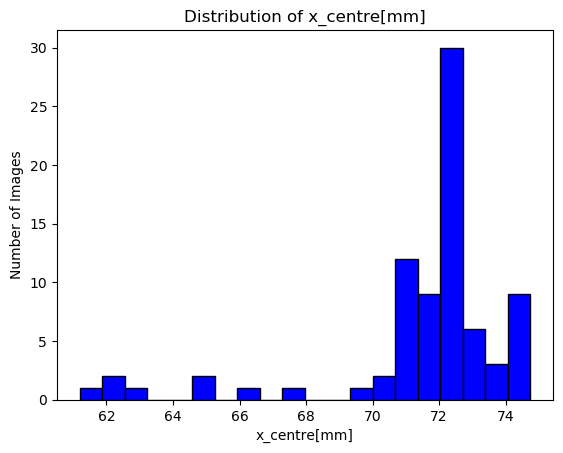

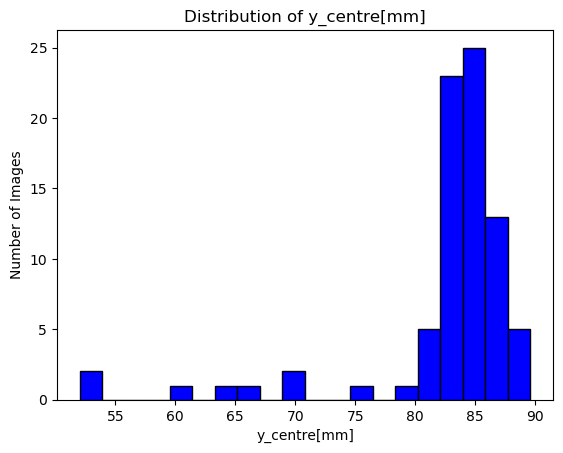

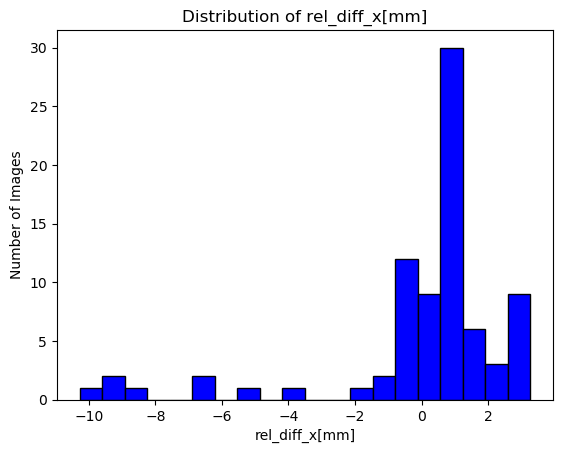

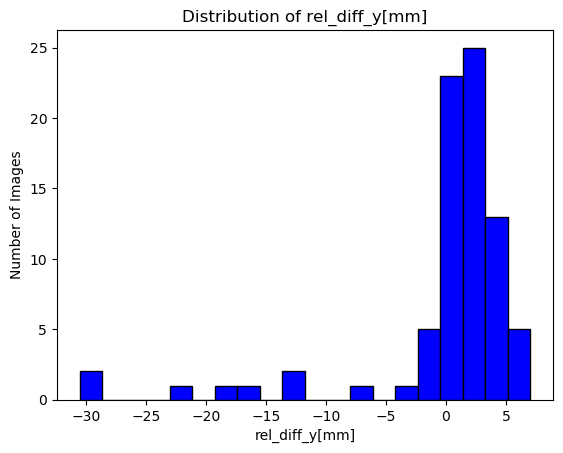

Histogram plots saved and displayed successfully.


In [78]:

# Create a directory to save the plots
#output_dir = r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Repository for data and scripts\Glenn\Github\Master_thesis\Results\plots"
os.makedirs(output_dir, exist_ok=True)

# Function to create, save, and display histogram plots
def create_histogram(data, column, title, output_dir):
    plt.figure()
    plt.hist(data[column], bins=20, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Number of Images')
    file_path = os.path.join(output_dir, f"{title}.png")
    plt.savefig(file_path)
    plt.show()  # Display the plot
    plt.close()

# Define the columns and their corresponding titles
columns_titles = {
    'x_centre[mm]': 'Distribution of x_centre[mm]',
    'y_centre[mm]': 'Distribution of y_centre[mm]',
    'rel_diff_x[mm]': 'Distribution of rel_diff_x[mm]',
    'rel_diff_y[mm]': 'Distribution of rel_diff_y[mm]'
}

# Assuming det_circ is the dataframe containing the data
# Generate, save, and display the histogram plots
for column, title in columns_titles.items():
    create_histogram(det_circ, column, title, output_dir)

print("Histogram plots saved and displayed successfully.")


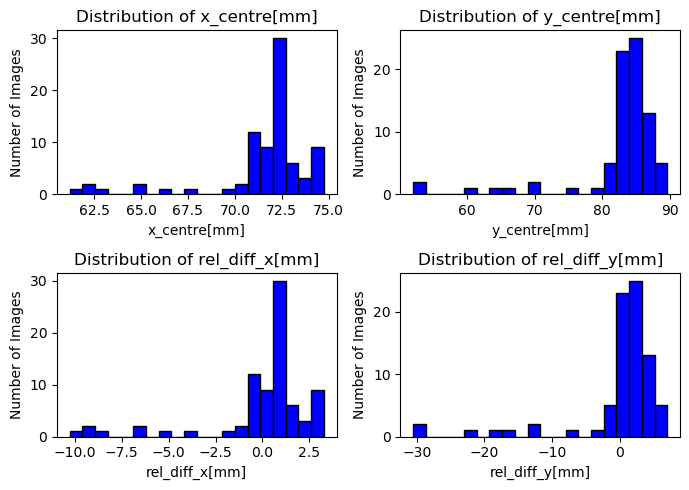

Histogram plots saved and displayed successfully.


In [79]:


# Create a directory to save the plots
output_dir = r'C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Repository for data and scripts\Glenn\Github\Master_thesis\Results\plots'
os.makedirs(output_dir, exist_ok=True)

# Function to create, save, and display histogram plots in subplots
def create_histogram_subplot(data, columns_titles, output_dir):
    fig, axs = plt.subplots(2, 2, figsize=(7, 5))
    axs = axs.ravel()

    for idx, (column, title) in enumerate(columns_titles.items()):
        axs[idx].hist(data[column], bins=20, color='blue', edgecolor='black')
        axs[idx].set_title(title)
        axs[idx].set_xlabel(column)
        axs[idx].set_ylabel('Number of Images')

    plt.tight_layout()
    file_path = os.path.join(output_dir, "combined_histograms.png")
    plt.savefig(file_path)
    plt.show()  # Display the plot
    plt.close()

# Define the columns and their corresponding titles
columns_titles = {
    'x_centre[mm]': 'Distribution of x_centre[mm]',
    'y_centre[mm]': 'Distribution of y_centre[mm]',
    'rel_diff_x[mm]': 'Distribution of rel_diff_x[mm]',
    'rel_diff_y[mm]': 'Distribution of rel_diff_y[mm]'
}

# Assuming det_circ is the dataframe containing the data
# Generate, save, and display the histogram plots in subplots
create_histogram_subplot(det_circ, columns_titles, output_dir)

print("Histogram plots saved and displayed successfully.")


c:\Users\kwayi\anaconda3\envs\hs_nb_env\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


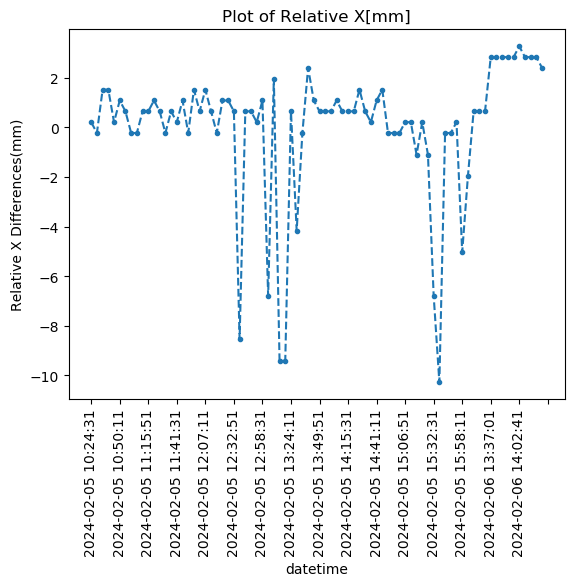

In [80]:
plt.plot(det_circ['datetime'], det_circ['rel_diff_x[mm]'], '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative X Differences(mm)')  # Adding label to y-axis
#plt.title('Plot of Relative X vs Relative Y Differences')
plt.title('Plot of Relative X[mm]')
plt.xticks(rotation=90)

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()



ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))

plt.show()

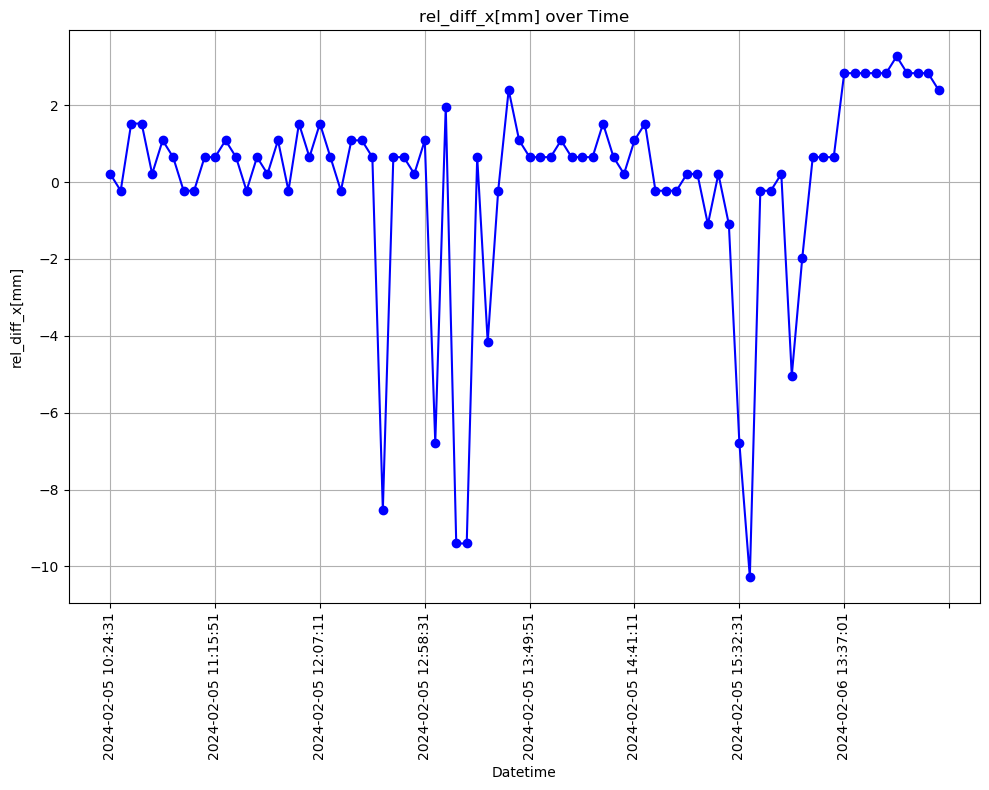

Plot saved as path_to_output_directory/plots/rel_diff_ymm_over_Time.png


In [82]:

output_dir = r'C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Repository for data and scripts\Glenn\Github\Master_thesis\Results\plots'
os.makedirs(output_dir, exist_ok=True)



# Plot 'x_centre[mm]' against 'datetime'
plt.figure(figsize=(10, 8))
plt.plot(det_circ['datetime'], det_circ['rel_diff_x[mm]'], marker='o', linestyle='-', color='blue')
title = 'rel_diff_x[mm] over Time'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_x[mm]')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
#plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Replace spaces and special characters in the title to create a valid filename
#filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
#output_file = os.path.join(output_dir, filename)
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

# Save the plot
#plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


In [ ]:
plt.plot(det_circ['datetime'], det_circ['rel_diff_x[mm]'], '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative X Differences(mm)')  # Adding label to y-axis
plt.title('Plot of Relative X[mm] over the period of measurement')
#plt.xticks(rotation=90)

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
# Save the combined plot as an image
combined_image_path =  r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Lab_test_data\images\rel_x_diff_2.jpg"  # Specify the path for saving the image
plt.savefig(combined_image_path)

# Close the plot to release resources
#plt.close()


#ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))


plt.show()

c:\Users\kwayi\anaconda3\envs\hs_nb_env\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


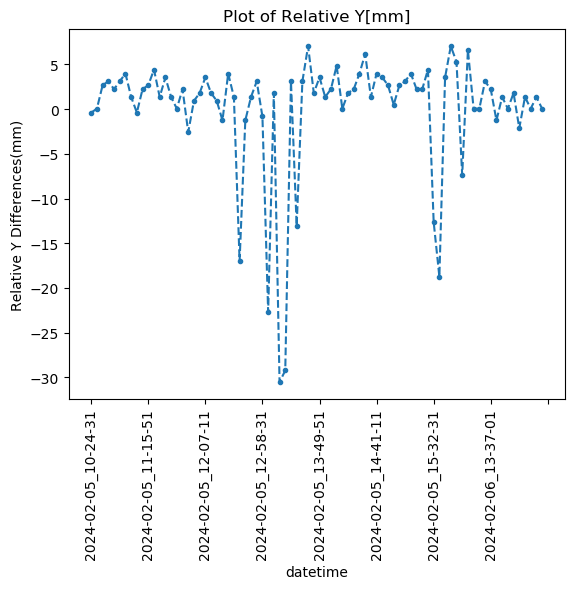

In [59]:
plt.plot(det_circ['datetime'], det_circ['rel_diff_y[mm]'], '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative Y Differences(mm)')  # Adding label to y-axis
#plt.title('Plot of Relative X vs Relative Y Differences')
plt.title('Plot of Relative Y[mm]')
plt.xticks(rotation=90)

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(True)
# Save the combined plot as an image
#combined_image_path =  r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Lab_test_data\images\rel_x_diff_1.jpg"  # Specify the path for saving the image
#plt.savefig(combined_image_path)

# Close the plot to release resources
#plt.close()


ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

plt.show()

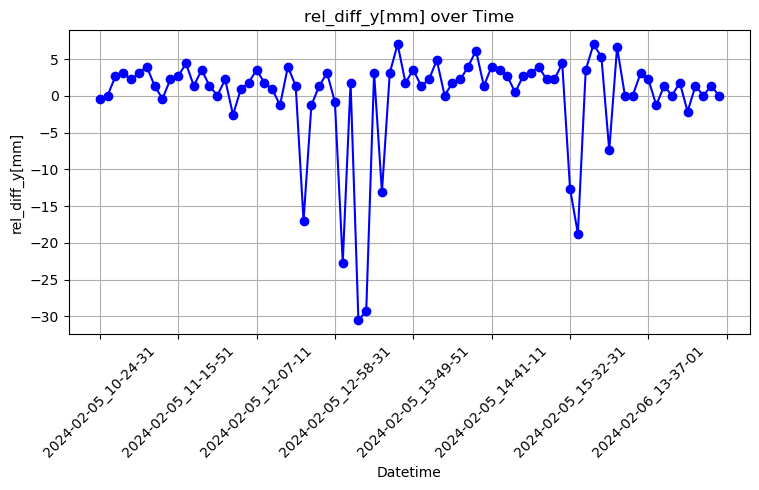

Plot saved as path_to_output_directory/plots/rel_diff_ymm_over_Time.png


In [60]:

#output_dir = 'path_to_output_directory/plots/'
os.makedirs(output_dir, exist_ok=True)



# Plot 'x_centre[mm]' against 'datetime'
plt.figure(figsize=(8, 5))
plt.plot(det_circ['datetime'], det_circ['rel_diff_y[mm]'], marker='o', linestyle='-', color='blue')
title = 'rel_diff_y[mm] over Time'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_y[mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
#plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Replace spaces and special characters in the title to create a valid filename
filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
output_file = os.path.join(output_dir, filename)
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

# Save the plot
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


In [ ]:


# Create a directory to save the plots
#output_dir = 'path_to_output_directory/plots/'
os.makedirs(output_dir, exist_ok=True)


# Filter the dataframe to include only data up to 2024-02-05 18:00:00
end_date = pd.to_datetime('2024-02-05 18:00:00')
filtered_data = det_circ[det_circ['datetime'] <= end_date]

# Plot 'rel_diff_x[mm]' against 'datetime' for the filtered data
plt.figure(figsize=(7, 4))
plt.plot(filtered_data['datetime'], filtered_data['rel_diff_x[mm]'], marker='o', linestyle='-', color='blue')
title = 'rel_diff_x[mm] over Time (up to 2024-02-05 18:00:00)'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_x[mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Replace spaces and special characters in the title to create a valid filename
filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
output_file = os.path.join(output_dir, filename)

# Save the plot
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


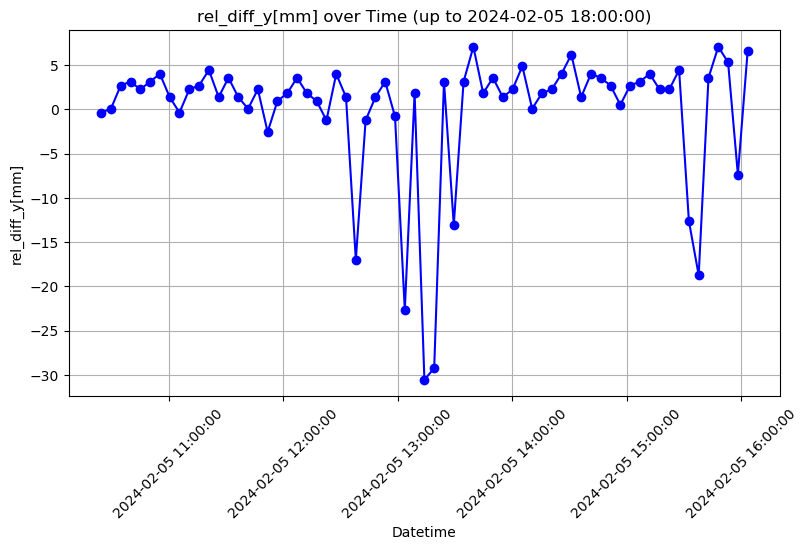

Plot saved as path_to_output_directory/plots/rel_diff_ymm_over_Time_(up_to_2024-02-05_180000).png


In [ ]:
#Plot of the relative difference between the elements of the y-axis which is in the direction of gravity

# Create a directory to save the plots
output_dir = 'path_to_output_directory/plots/'
os.makedirs(output_dir, exist_ok=True)


# Filter the dataframe to include only data up to 2024-02-05 18:00:00
end_date = pd.to_datetime('2024-02-05 18:00:00')
filtered_data = det_circ[det_circ['datetime'] <= end_date]

# Plot 'rel_diff_x[mm]' against 'datetime' for the filtered data
plt.figure(figsize=(8, 5))
plt.plot(filtered_data['datetime'], filtered_data['rel_diff_y[mm]'], marker='o', linestyle='-', color='blue')
title = 'rel_diff_y[mm] over Time (up to 2024-02-05 18:00:00)'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_y[mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Replace spaces and special characters in the title to create a valid filename
filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
output_file = os.path.join(output_dir, filename)

# Save the plot
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


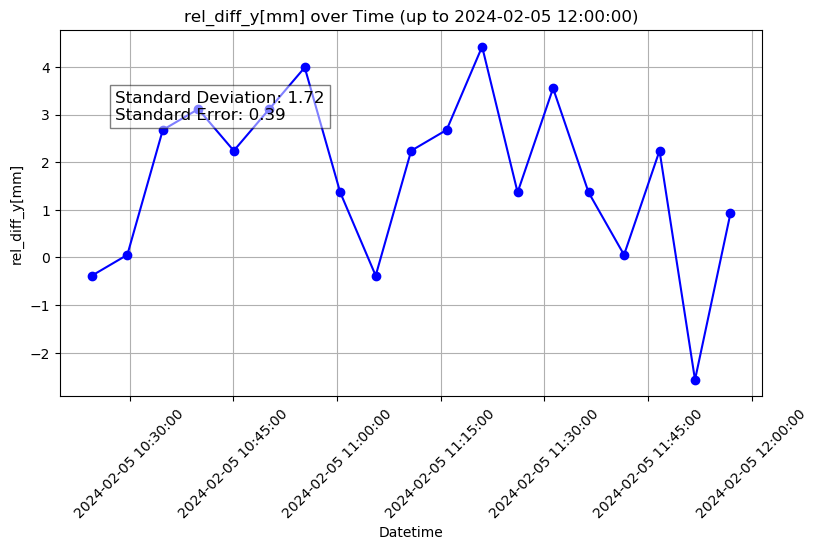

Plot saved as path_to_output_directory/plots\rel_diff_ymm_over_Time_(up_to_2024-02-05_120000).png


In [ ]:

# Create a directory to save the plots
output_dir = 'path_to_output_directory/plots'
os.makedirs(output_dir, exist_ok=True)



# Filter the dataframe to include only data up to 2024-02-05 12:00:00
end_date = pd.to_datetime('2024-02-05 12:00:00')
filtered_data = det_circ[det_circ['datetime'] <= end_date]

# Calculate standard deviation and standard error
std_dev = np.std(filtered_data['rel_diff_y[mm]'])
std_error = std_dev / np.sqrt(len(filtered_data['rel_diff_y[mm]']))

# Plot 'rel_diff_x[mm]' against 'datetime' for the filtered data
plt.figure(figsize=(8, 5))
plt.plot(filtered_data['datetime'], filtered_data['rel_diff_y[mm]'], marker='o', linestyle='-', color='blue')
title = 'rel_diff_y[mm] over Time (up to 2024-02-05 12:00:00)'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_y[mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error
textstr = f'Standard Deviation: {std_dev:.2f}\nStandard Error: {std_error:.2f}'
plt.gcf().text(0.15, 0.75, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Replace spaces and special characters in the title to create a valid filename
filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
output_file = os.path.join(output_dir, filename)

# Save the plot
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


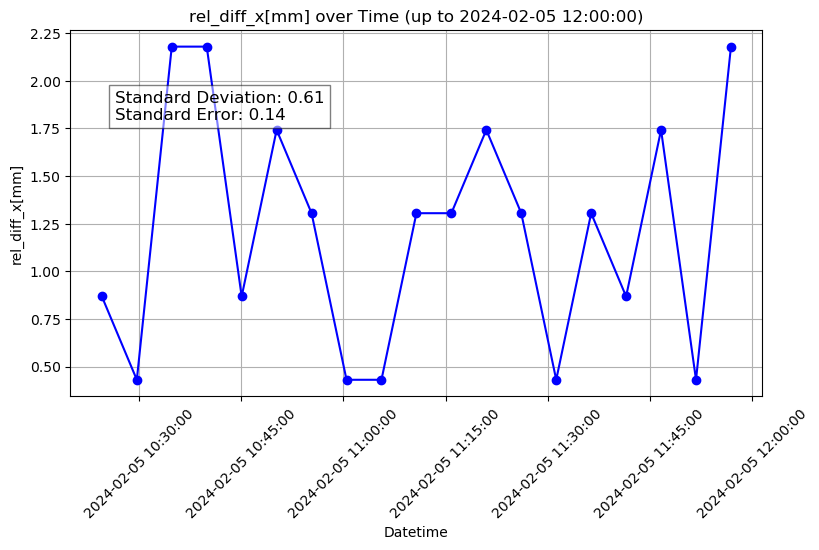

Plot saved as path_to_output_directory/plots\rel_diff_xmm_over_Time_(up_to_2024-02-05_120000).png


In [ ]:

# Create a directory to save the plots
output_dir = 'path_to_output_directory/plots'
os.makedirs(output_dir, exist_ok=True)



# Filter the dataframe to include only data up to 2024-02-05 12:00:00
end_date = pd.to_datetime('2024-02-05 12:00:00')
filtered_data = det_circ[det_circ['datetime'] <= end_date]

# Calculate standard deviation and standard error
std_dev = np.std(filtered_data['rel_diff_x[mm]'])
std_error = std_dev / np.sqrt(len(filtered_data['rel_diff_x[mm]']))

# Plot 'rel_diff_x[mm]' against 'datetime' for the filtered data
plt.figure(figsize=(8, 5))
plt.plot(filtered_data['datetime'], filtered_data['rel_diff_x[mm]'], marker='o', linestyle='-', color='blue')
title = 'rel_diff_x[mm] over Time (up to 2024-02-05 12:00:00)'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_x[mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error
textstr = f'Standard Deviation: {std_dev:.2f}\nStandard Error: {std_error:.2f}'
plt.gcf().text(0.15, 0.75, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Replace spaces and special characters in the title to create a valid filename
filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
output_file = os.path.join(output_dir, filename)

# Save the plot
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


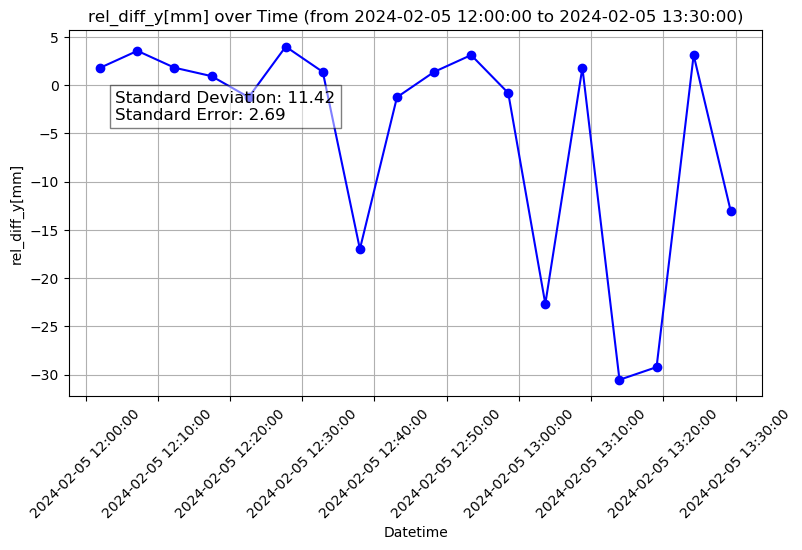

Plot saved as path_to_output_directory/plots\rel_diff_ymm_over_Time_(from_2024-02-05_120000_to_2024-02-05_133000).png


In [ ]:
# Create a directory to save the plots
output_dir = 'path_to_output_directory/plots'
os.makedirs(output_dir, exist_ok=True)


# Filter the dataframe to include only data from 2024-02-05 12:00:00 to 2024-02-05 13:30:00
start_date = pd.to_datetime('2024-02-05 12:00:00')
end_date = pd.to_datetime('2024-02-05 13:30:00')
filtered_data = det_circ[(det_circ['datetime'] >= start_date) & (det_circ['datetime'] <= end_date)]

# Calculate standard deviation and standard error
std_dev = np.std(filtered_data['rel_diff_y[mm]'])
std_error = std_dev / np.sqrt(len(filtered_data['rel_diff_y[mm]']))

# Plot 'rel_diff_x[mm]' against 'datetime' for the filtered data
plt.figure(figsize=(8, 5))
plt.plot(filtered_data['datetime'], filtered_data['rel_diff_y[mm]'], marker='o', linestyle='-', color='blue')
title = 'rel_diff_y[mm] over Time (from 2024-02-05 12:00:00 to 2024-02-05 13:30:00)'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_y[mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error
textstr = f'Standard Deviation: {std_dev:.2f}\nStandard Error: {std_error:.2f}'
plt.gcf().text(0.15, 0.75, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Replace spaces and special characters in the title to create a valid filename
filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
output_file = os.path.join(output_dir, filename)

# Save the plot
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


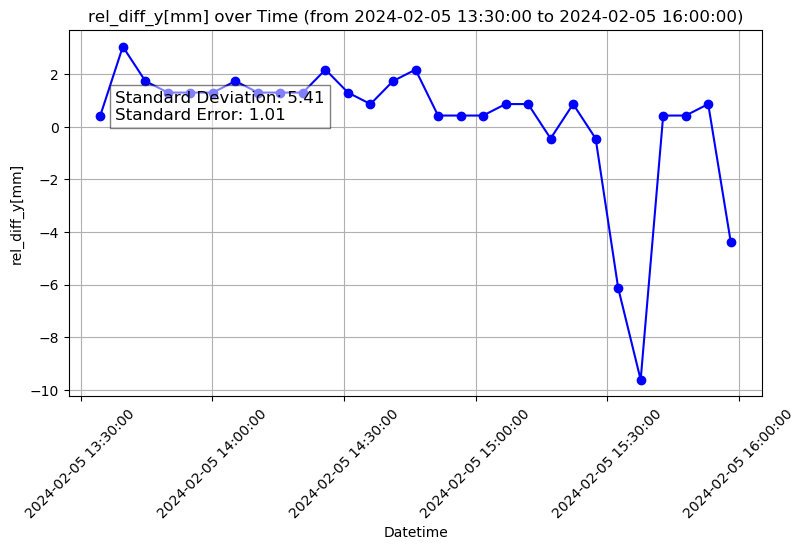

Plot saved as path_to_output_directory/plots\rel_diff_ymm_over_Time_(from_2024-02-05_133000_to_2024-02-05_160000).png


In [ ]:
# Create a directory to save the plots
output_dir = 'path_to_output_directory/plots'
os.makedirs(output_dir, exist_ok=True)


# Filter the dataframe to include only data from 2024-02-05 13:30:00 to 2024-02-05 16:00:00
start_date = pd.to_datetime('2024-02-05 13:30:00')
end_date = pd.to_datetime('2024-02-05 16:00:00')
filtered_data = det_circ[(det_circ['datetime'] >= start_date) & (det_circ['datetime'] <= end_date)]

# Calculate standard deviation and standard error
std_dev = np.std(filtered_data['rel_diff_y[mm]'])
std_error = std_dev / np.sqrt(len(filtered_data['rel_diff_y[mm]']))

# Plot 'rel_diff_x[mm]' against 'datetime' for the filtered data
plt.figure(figsize=(8, 5))
plt.plot(filtered_data['datetime'], filtered_data['rel_diff_x[mm]'], marker='o', linestyle='-', color='blue')
title = 'rel_diff_y[mm] over Time (from 2024-02-05 13:30:00 to 2024-02-05 16:00:00)'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_y[mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error
textstr = f'Standard Deviation: {std_dev:.2f}\nStandard Error: {std_error:.2f}'
plt.gcf().text(0.15, 0.75, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Replace spaces and special characters in the title to create a valid filename
filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
output_file = os.path.join(output_dir, filename)

# Save the plot
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


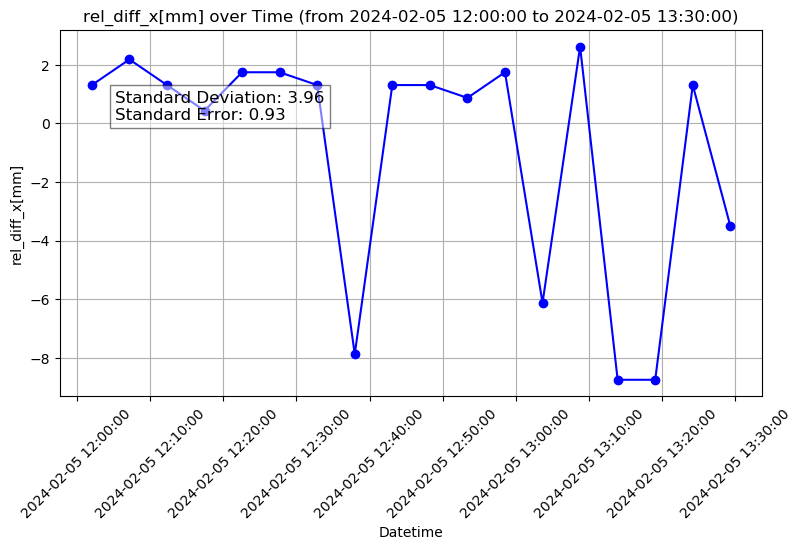

Plot saved as path_to_output_directory/plots\rel_diff_xmm_over_Time_(from_2024-02-05_120000_to_2024-02-05_133000).png


In [ ]:
# Create a directory to save the plots
output_dir = 'path_to_output_directory/plots'
os.makedirs(output_dir, exist_ok=True)


# Filter the dataframe to include only data from 2024-02-05 12:00:00 to 2024-02-05 13:30:00
start_date = pd.to_datetime('2024-02-05 12:00:00')
end_date = pd.to_datetime('2024-02-05 13:30:00')
filtered_data = det_circ[(det_circ['datetime'] >= start_date) & (det_circ['datetime'] <= end_date)]

# Calculate standard deviation and standard error
std_dev = np.std(filtered_data['rel_diff_x[mm]'])
std_error = std_dev / np.sqrt(len(filtered_data['rel_diff_x[mm]']))

# Plot 'rel_diff_x[mm]' against 'datetime' for the filtered data
plt.figure(figsize=(8, 5))
plt.plot(filtered_data['datetime'], filtered_data['rel_diff_x[mm]'], marker='o', linestyle='-', color='blue')
title = 'rel_diff_x[mm] over Time (from 2024-02-05 12:00:00 to 2024-02-05 13:30:00)'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_x[mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error
textstr = f'Standard Deviation: {std_dev:.2f}\nStandard Error: {std_error:.2f}'
plt.gcf().text(0.15, 0.75, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Replace spaces and special characters in the title to create a valid filename
filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
output_file = os.path.join(output_dir, filename)

# Save the plot
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


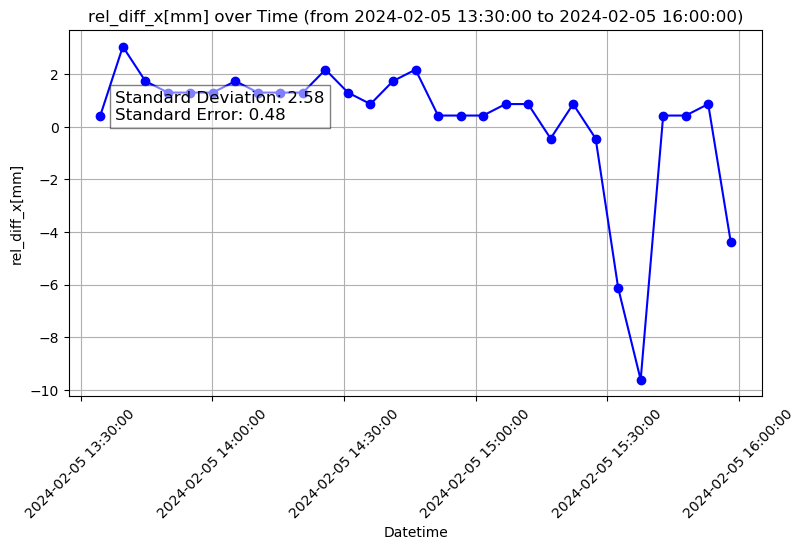

Plot saved as path_to_output_directory/plots\rel_diff_xmm_over_Time_(from_2024-02-05_133000_to_2024-02-05_160000).png


In [ ]:
# Create a directory to save the plots
output_dir = 'path_to_output_directory/plots'
os.makedirs(output_dir, exist_ok=True)


# Filter the dataframe to include only data from 2024-02-05 13:30:00 to 2024-02-05 16:00:00
start_date = pd.to_datetime('2024-02-05 13:30:00')
end_date = pd.to_datetime('2024-02-05 16:00:00')
filtered_data = det_circ[(det_circ['datetime'] >= start_date) & (det_circ['datetime'] <= end_date)]

# Calculate standard deviation and standard error
std_dev = np.std(filtered_data['rel_diff_x[mm]'])
std_error = std_dev / np.sqrt(len(filtered_data['rel_diff_x[mm]']))

# Plot 'rel_diff_x[mm]' against 'datetime' for the filtered data
plt.figure(figsize=(8, 5))
plt.plot(filtered_data['datetime'], filtered_data['rel_diff_x[mm]'], marker='o', linestyle='-', color='blue')
title = 'rel_diff_x[mm] over Time (from 2024-02-05 13:30:00 to 2024-02-05 16:00:00)'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_x[mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error
textstr = f'Standard Deviation: {std_dev:.2f}\nStandard Error: {std_error:.2f}'
plt.gcf().text(0.15, 0.75, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Replace spaces and special characters in the title to create a valid filename
filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
output_file = os.path.join(output_dir, filename)

# Save the plot
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


In [33]:
# Identify outliers in 'rel_diff_y[mm]' where values are greater than +-10mm
outliers_y = det_circ[(det_circ['rel_diff_y[mm]'] < -10) | (det_circ['rel_diff_y[mm]'] > 10)]

# Count the number of outliers
num_outliers_y = len(outliers_y)

# List the outlier values
outlier_values_y = outliers_y['rel_diff_y[mm]'].tolist()

# Get the corresponding 'Image' values for these outliers
outlier_images_y = outliers_y['Image'].tolist()

print(f"Number of outliers_y: {num_outliers_y}")
print(f"Outlier values_y: {outlier_values_y}")
print(f"Outlier images_y: {outlier_images_y}")


Number of outliers_y: 7
Outlier values_y: [-16.992143153750007, -22.67440324375, -30.542147983750006, -29.230857193750005, -13.058270783750004, -12.621173853750008, -18.740530873750004]
Outlier images_y: ['IMG_13055_2024-02-05_12-37-59.jpg', 'IMG_13060_2024-02-05_13-03-39.jpg', 'IMG_13062_2024-02-05_13-13-55.jpg', 'IMG_13063_2024-02-05_13-19-03.jpg', 'IMG_13065_2024-02-05_13-29-19.jpg', 'IMG_13089_2024-02-05_15-32-31.jpg', 'IMG_13090_2024-02-05_15-37-39.jpg']


In [ ]:
dist = 80
v1 = outlier_values_y[0]
v2 = outlier_values_y[1]
v3 = outlier_values_y[2]
v4 = outlier_values_y[3]
v5 = outlier_values_y[4]
v6 = outlier_values_y[5]
v7 = outlier_values_y[6]
#v8 = outlier_values_y[7]
#v9 = outlier_values_y[8]


ang1 = math.degrees(math.atan(( v1/1000)/dist))

ang2 = math.degrees(math.atan(( v2/1000)/dist))

ang3 = math.degrees(math.atan(( v3/1000)/dist))

ang4 = math.degrees(math.atan(( v4/1000)/dist))

ang5 = math.degrees(math.atan(( v5/1000)/dist))

ang6 = math.degrees(math.atan(( v6/1000)/dist))

ang7 = math.degrees(math.atan(( v7/1000)/dist))

#ang8 = math.degrees(math.atan(( v8/1000)/dist))

#ang9 = math.degrees(math.atan(( v9/1000)/dist))





print(' angular diff_y1 = ', ang1)
print(' angular diff_y2 = ', ang2)
print(' angular diff_y3 = ', ang3)
print(' angular diff_y4 = ', ang4)
print(' angular diff_y5 = ', ang5)
print(' angular diff_y6 = ', ang6)
print(' angular diff_y7 = ', ang7)
#print(' angular diff_y8 = ', ang8)
#print(' angular diff_y9 = ', ang9)



 angular diff_y1 =  -0.012169230583404526
 angular diff_y2 =  -0.016238849347240732
 angular diff_y3 =  -0.021873705817978276
 angular diff_y4 =  -0.020934563099295596
 angular diff_y5 =  -0.009351802134044905
 angular diff_y6 =  -0.009038754525519593
 angular diff_y7 =  -0.013421420987261604


In [35]:
# Identify outliers in 'rel_diff_x[mm]' where values are greater than 5mm or less than -5mm
outliers_x = det_circ[(det_circ['rel_diff_x[mm]'] < -10) | (det_circ['rel_diff_x[mm]'] > 10)]

# Count the number of outliers
num_outliers_x = len(outliers_x)

# List the outlier values
outlier_values_x = outliers_x['rel_diff_x[mm]'].tolist()

# Get the corresponding 'Image' values for these outliers
outlier_images_x = outliers_x['Image'].tolist()

# Print the results
print(f"Number of outliers_x: {num_outliers_x}")
print(f"Outlier values_x: {outlier_values_x}")
print(f"Outlier images_x: {outlier_images_x}")



Number of outliers_x: 1
Outlier values_x: [-10.277241566625008]
Outlier images_x: ['IMG_13090_2024-02-05_15-37-39.jpg']


In [ ]:
dist = 80
v1 = outlier_values_x[0]
v2 = outlier_values_x[1]
v3 = outlier_values_x[2]
v4 = outlier_values_x[3]
v5 = outlier_values_x[4]
v6 = outlier_values_x[5]
#v7 = outlier_values_x[6]
#v8 = outlier_values_x[7]
#v9 = outlier_values_x[8]


ang1 = math.degrees(math.atan(( v1/1000)/dist))

ang2 = math.degrees(math.atan(( v2/1000)/dist))

ang3 = math.degrees(math.atan(( v3/1000)/dist))

ang4 = math.degrees(math.atan(( v4/1000)/dist))

ang5 = math.degrees(math.atan(( v5/1000)/dist))

ang6 = math.degrees(math.atan(( v6/1000)/dist))

#ang7 = math.degrees(math.atan(( v7/1000)/dist))

#ang8 = math.degrees(math.atan(( v8/1000)/dist))

#ang9 = math.degrees(math.atan(( v9/1000)/dist))





print(' angular diff_x1 = ', ang1)
print(' angular diff_x2 = ', ang2)
print(' angular diff_x3 = ', ang3)
print(' angular diff_x4 = ', ang4)
print(' angular diff_x5 = ', ang5)
print(' angular diff_x6 = ', ang6)
#print(' angular diff_x7 = ', ang7)
#print(' angular diff_x8 = ', ang8)
#print(' angular diff_x9 = ', ang9)



 angular diff_x1 =  -0.00563929717794333
 angular diff_x2 =  -0.004387106721223308
 angular diff_x3 =  -0.0062653924043579575
 angular diff_x4 =  -0.0062653924043579575
 angular diff_x5 =  -0.004387106721223308
 angular diff_x6 =  -0.006891487629276308


In [ ]:
# Load the new Excel file
file_path = r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Glenn__upssss\Glenn\Rotated_hydro_XT.csv"
hydro1 = pd.read_csv(file_path, skiprows= 0, sep=',')
hydro1.dropna

#hydro1=hydro1.iloc[::-1]
hydro1

,Datum,dH [mm],dH [mm].1,dH [mm].2,dH [mm].3,dH [mm].4,dH [mm].5,dH [mm].6,dH [mm].7,dH [mm].8,...,dH [mm].53,dH [mm].54,dH [mm].55,dH [mm].56,dH [mm].57,dH [mm].58,dH [mm].59,dH [mm].60,dH [mm].61,Unnamed: 63
0,05.02.2024 00:00,-7.8909,-7.8279,-7.6179,-7.2689,-8.3529,-7.3319,0.333,-0.419,-6.3959,...,-1.9529,0.3781,0.2881,-2.4609,-3.3739,-6.8949,-7.6899,-5.6699,-7.2519,NaN
1,05.02.2024 00:05,-7.5994,-7.5814,-7.3754,-7.0484,-8.0824,-7.0414,0.274,-0.503,-6.1574,...,-2.0714,0.4066,0.4086,-2.3594,-2.8924,-6.6084,-7.4224,-5.4784,-6.9634,NaN
2,05.02.2024 00:10,-8.5274,-8.4284,-8.2854,-7.8744,-8.9234,-7.8884,0.024,-0.663,-6.9744,...,-2.1804,0.2266,0.0126,-2.7084,-3.4994,-7.5524,-8.1764,-6.3494,-7.8864,NaN
3,05.02.2024 00:15,-7.9672,-7.9502,-7.7552,-7.4212,-8.5382,-7.4452,0.268,-0.444,-6.5162,...,-1.8012,0.3828,0.1978,-2.4862,-3.4232,-6.9332,-7.5962,-5.6452,-7.2462,NaN
4,05.02.2024 00:20,-7.8025,-7.8015,-7.6255,-7.2145,-8.2065,-7.2215,0.324,-0.344,-6.3255,...,-1.8055,0.5795,0.1185,-2.5285,-3.2975,-6.8865,-7.5005,-5.7745,-7.1355,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,06.02.2024 23:35,-2.6469,-2.6789,-2.5089,-2.0979,-2.9969,-2.2719,0.764,-0.317,-1.2339,...,4.9121,7.9031,6.8491,3.3451,2.0291,-1.7769,-2.0969,0.0691,-1.9869,NaN
572,06.02.2024 23:40,-2.8193,-2.6943,-2.6163,-2.2293,-3.2293,-2.4873,0.632,-0.813,-1.3973,...,4.3637,7.5097,6.6157,3.0587,2.8197,-1.8443,-2.5513,-0.2993,-2.1303,NaN
573,06.02.2024 23:45,-2.4433,-2.8673,-2.3233,-1.8163,-2.9873,-1.9803,0.634,-0.514,-0.8533,...,4.7557,7.7517,6.9107,3.2937,2.4917,-1.4863,-2.1323,0.0667,-1.6903,NaN
574,06.02.2024 23:50,-2.9723,-3.1113,-2.9533,-2.5203,-3.5423,-2.8353,0.728,-0.489,-1.7973,...,4.1457,7.4977,6.6017,3.2837,2.2857,-2.0593,-2.7763,-0.6063,-2.3223,NaN


In [ ]:
hydro1['datetime'] = hydro1['Datum']

hydro1


,Datum,dH [mm],dH [mm].1,dH [mm].2,dH [mm].3,dH [mm].4,dH [mm].5,dH [mm].6,dH [mm].7,dH [mm].8,...,dH [mm].54,dH [mm].55,dH [mm].56,dH [mm].57,dH [mm].58,dH [mm].59,dH [mm].60,dH [mm].61,Unnamed: 63,datetime
0,05.02.2024 00:00,-7.8909,-7.8279,-7.6179,-7.2689,-8.3529,-7.3319,0.333,-0.419,-6.3959,...,0.3781,0.2881,-2.4609,-3.3739,-6.8949,-7.6899,-5.6699,-7.2519,NaN,05.02.2024 00:00
1,05.02.2024 00:05,-7.5994,-7.5814,-7.3754,-7.0484,-8.0824,-7.0414,0.274,-0.503,-6.1574,...,0.4066,0.4086,-2.3594,-2.8924,-6.6084,-7.4224,-5.4784,-6.9634,NaN,05.02.2024 00:05
2,05.02.2024 00:10,-8.5274,-8.4284,-8.2854,-7.8744,-8.9234,-7.8884,0.024,-0.663,-6.9744,...,0.2266,0.0126,-2.7084,-3.4994,-7.5524,-8.1764,-6.3494,-7.8864,NaN,05.02.2024 00:10
3,05.02.2024 00:15,-7.9672,-7.9502,-7.7552,-7.4212,-8.5382,-7.4452,0.268,-0.444,-6.5162,...,0.3828,0.1978,-2.4862,-3.4232,-6.9332,-7.5962,-5.6452,-7.2462,NaN,05.02.2024 00:15
4,05.02.2024 00:20,-7.8025,-7.8015,-7.6255,-7.2145,-8.2065,-7.2215,0.324,-0.344,-6.3255,...,0.5795,0.1185,-2.5285,-3.2975,-6.8865,-7.5005,-5.7745,-7.1355,NaN,05.02.2024 00:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,06.02.2024 23:35,-2.6469,-2.6789,-2.5089,-2.0979,-2.9969,-2.2719,0.764,-0.317,-1.2339,...,7.9031,6.8491,3.3451,2.0291,-1.7769,-2.0969,0.0691,-1.9869,NaN,06.02.2024 23:35
572,06.02.2024 23:40,-2.8193,-2.6943,-2.6163,-2.2293,-3.2293,-2.4873,0.632,-0.813,-1.3973,...,7.5097,6.6157,3.0587,2.8197,-1.8443,-2.5513,-0.2993,-2.1303,NaN,06.02.2024 23:40
573,06.02.2024 23:45,-2.4433,-2.8673,-2.3233,-1.8163,-2.9873,-1.9803,0.634,-0.514,-0.8533,...,7.7517,6.9107,3.2937,2.4917,-1.4863,-2.1323,0.0667,-1.6903,NaN,06.02.2024 23:45
574,06.02.2024 23:50,-2.9723,-3.1113,-2.9533,-2.5203,-3.5423,-2.8353,0.728,-0.489,-1.7973,...,7.4977,6.6017,3.2837,2.2857,-2.0593,-2.7763,-0.6063,-2.3223,NaN,06.02.2024 23:50


In [ ]:
hydro1['datetime'] = hydro1['datetime'].astype(str).str.replace('.', '-')
hydro1


c:\Users\kwayi\anaconda3\envs\hs_nb_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Datum,dH [mm],dH [mm].1,dH [mm].2,dH [mm].3,dH [mm].4,dH [mm].5,dH [mm].6,dH [mm].7,dH [mm].8,...,dH [mm].54,dH [mm].55,dH [mm].56,dH [mm].57,dH [mm].58,dH [mm].59,dH [mm].60,dH [mm].61,Unnamed: 63,datetime
0,05.02.2024 00:00,-7.8909,-7.8279,-7.6179,-7.2689,-8.3529,-7.3319,0.333,-0.419,-6.3959,...,0.3781,0.2881,-2.4609,-3.3739,-6.8949,-7.6899,-5.6699,-7.2519,NaN,05-02-2024 00:00
1,05.02.2024 00:05,-7.5994,-7.5814,-7.3754,-7.0484,-8.0824,-7.0414,0.274,-0.503,-6.1574,...,0.4066,0.4086,-2.3594,-2.8924,-6.6084,-7.4224,-5.4784,-6.9634,NaN,05-02-2024 00:05
2,05.02.2024 00:10,-8.5274,-8.4284,-8.2854,-7.8744,-8.9234,-7.8884,0.024,-0.663,-6.9744,...,0.2266,0.0126,-2.7084,-3.4994,-7.5524,-8.1764,-6.3494,-7.8864,NaN,05-02-2024 00:10
3,05.02.2024 00:15,-7.9672,-7.9502,-7.7552,-7.4212,-8.5382,-7.4452,0.268,-0.444,-6.5162,...,0.3828,0.1978,-2.4862,-3.4232,-6.9332,-7.5962,-5.6452,-7.2462,NaN,05-02-2024 00:15
4,05.02.2024 00:20,-7.8025,-7.8015,-7.6255,-7.2145,-8.2065,-7.2215,0.324,-0.344,-6.3255,...,0.5795,0.1185,-2.5285,-3.2975,-6.8865,-7.5005,-5.7745,-7.1355,NaN,05-02-2024 00:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,06.02.2024 23:35,-2.6469,-2.6789,-2.5089,-2.0979,-2.9969,-2.2719,0.764,-0.317,-1.2339,...,7.9031,6.8491,3.3451,2.0291,-1.7769,-2.0969,0.0691,-1.9869,NaN,06-02-2024 23:35
572,06.02.2024 23:40,-2.8193,-2.6943,-2.6163,-2.2293,-3.2293,-2.4873,0.632,-0.813,-1.3973,...,7.5097,6.6157,3.0587,2.8197,-1.8443,-2.5513,-0.2993,-2.1303,NaN,06-02-2024 23:40
573,06.02.2024 23:45,-2.4433,-2.8673,-2.3233,-1.8163,-2.9873,-1.9803,0.634,-0.514,-0.8533,...,7.7517,6.9107,3.2937,2.4917,-1.4863,-2.1323,0.0667,-1.6903,NaN,06-02-2024 23:45
574,06.02.2024 23:50,-2.9723,-3.1113,-2.9533,-2.5203,-3.5423,-2.8353,0.728,-0.489,-1.7973,...,7.4977,6.6017,3.2837,2.2857,-2.0593,-2.7763,-0.6063,-2.3223,NaN,06-02-2024 23:50


In [ ]:
# Convert the 'Datum' column to datetime data type with the original format
hydro1['datetime'] = pd.to_datetime(hydro1['datetime'], format='%d-%m-%Y %H:%M')

# Reformat the 'Datum' column to the desired format
hydro1['datetime'] = hydro1['datetime'].dt.strftime('%Y-%m-%d %H:%M')

# Convert back to datetime to plot correctly
hydro1['datetime'] = pd.to_datetime(hydro1['datetime'], format='%Y-%m-%d %H:%M')

#hydro1.set_index('datetime', inplace=True)

hydro1

,Datum,dH [mm],dH [mm].1,dH [mm].2,dH [mm].3,dH [mm].4,dH [mm].5,dH [mm].6,dH [mm].7,dH [mm].8,...,dH [mm].54,dH [mm].55,dH [mm].56,dH [mm].57,dH [mm].58,dH [mm].59,dH [mm].60,dH [mm].61,Unnamed: 63,datetime
0,05.02.2024 00:00,-7.8909,-7.8279,-7.6179,-7.2689,-8.3529,-7.3319,0.333,-0.419,-6.3959,...,0.3781,0.2881,-2.4609,-3.3739,-6.8949,-7.6899,-5.6699,-7.2519,NaN,2024-02-05 00:00:00
1,05.02.2024 00:05,-7.5994,-7.5814,-7.3754,-7.0484,-8.0824,-7.0414,0.274,-0.503,-6.1574,...,0.4066,0.4086,-2.3594,-2.8924,-6.6084,-7.4224,-5.4784,-6.9634,NaN,2024-02-05 00:05:00
2,05.02.2024 00:10,-8.5274,-8.4284,-8.2854,-7.8744,-8.9234,-7.8884,0.024,-0.663,-6.9744,...,0.2266,0.0126,-2.7084,-3.4994,-7.5524,-8.1764,-6.3494,-7.8864,NaN,2024-02-05 00:10:00
3,05.02.2024 00:15,-7.9672,-7.9502,-7.7552,-7.4212,-8.5382,-7.4452,0.268,-0.444,-6.5162,...,0.3828,0.1978,-2.4862,-3.4232,-6.9332,-7.5962,-5.6452,-7.2462,NaN,2024-02-05 00:15:00
4,05.02.2024 00:20,-7.8025,-7.8015,-7.6255,-7.2145,-8.2065,-7.2215,0.324,-0.344,-6.3255,...,0.5795,0.1185,-2.5285,-3.2975,-6.8865,-7.5005,-5.7745,-7.1355,NaN,2024-02-05 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,06.02.2024 23:35,-2.6469,-2.6789,-2.5089,-2.0979,-2.9969,-2.2719,0.764,-0.317,-1.2339,...,7.9031,6.8491,3.3451,2.0291,-1.7769,-2.0969,0.0691,-1.9869,NaN,2024-02-06 23:35:00
572,06.02.2024 23:40,-2.8193,-2.6943,-2.6163,-2.2293,-3.2293,-2.4873,0.632,-0.813,-1.3973,...,7.5097,6.6157,3.0587,2.8197,-1.8443,-2.5513,-0.2993,-2.1303,NaN,2024-02-06 23:40:00
573,06.02.2024 23:45,-2.4433,-2.8673,-2.3233,-1.8163,-2.9873,-1.9803,0.634,-0.514,-0.8533,...,7.7517,6.9107,3.2937,2.4917,-1.4863,-2.1323,0.0667,-1.6903,NaN,2024-02-06 23:45:00
574,06.02.2024 23:50,-2.9723,-3.1113,-2.9533,-2.5203,-3.5423,-2.8353,0.728,-0.489,-1.7973,...,7.4977,6.6017,3.2837,2.2857,-2.0593,-2.7763,-0.6063,-2.3223,NaN,2024-02-06 23:50:00


In [ ]:
# Define the output directory and file name
output_dir = r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Glenn__upssss\Glenn"
output_file = output_dir + "New_hydro_rotate2.csv"

# Save the DataFrame to a CSV file
hydro1.to_csv(output_file, sep='\t')

print(f"DataFrame saved as {output_file}")

DataFrame saved as C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Glenn__upssss\GlennNew_hydro_rotate2.csv


In [ ]:
hydro1.drop(columns=['Datum'], inplace=True)

In [ ]:
hydro1 = hydro1[['datetime', 'dH [mm]', 'dH [mm].1', 'dH [mm].2', 'dH [mm].3', 'dH [mm].4',
       'dH [mm].5', 'dH [mm].6', 'dH [mm].7', 'dH [mm].8', 'dH [mm].9',
       'dH [mm].10', 'dH [mm].11', 'dH [mm].12', 'dH [mm].13', 'dH [mm].14',
       'dH [mm].15', 'dH [mm].16', 'dH [mm].17', 'dH [mm].18', 'dH [mm].19',
       'dH [mm].20', 'dH [mm].21', 'dH [mm].22', 'dH [mm].23', 'dH [mm].24',
       'dH [mm].25', 'dH [mm].26', 'dH [mm].27', 'dH [mm].28', 'dH [mm].29',
       'dH [mm].30', 'dH [mm].31', 'dH [mm].32', 'dH [mm].33', 'dH [mm].34',
       'dH [mm].35', 'dH [mm].36', 'dH [mm].37', 'dH [mm].38', 'dH [mm].39',
       'dH [mm].40', 'dH [mm].41', 'dH [mm].42', 'dH [mm].43', 'dH [mm].44',
       'dH [mm].45', 'dH [mm].46', 'dH [mm].47', 'dH [mm].48', 'dH [mm].49',
       'dH [mm].50', 'dH [mm].51', 'dH [mm].52', 'dH [mm].53', 'dH [mm].54',
       'dH [mm].55', 'dH [mm].56', 'dH [mm].57', 'dH [mm].58', 'dH [mm].59',
       'dH [mm].60', 'dH [mm].61', 'Unnamed: 63']]

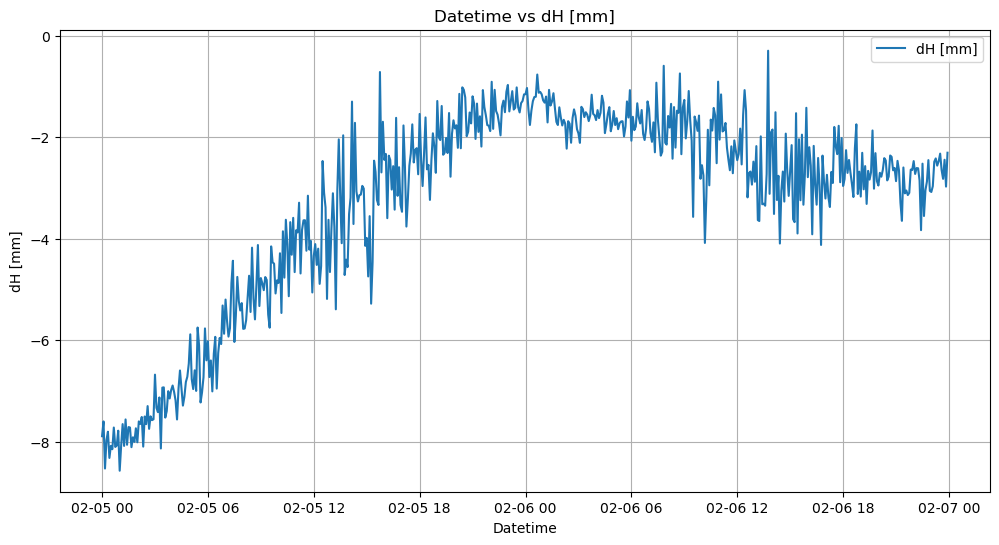

In [ ]:
# Convert the datetime column to a datetime object
hydro1['datetime'] = pd.to_datetime(hydro1['datetime'])

# Plot the datetime against the first dH [mm] column
plt.figure(figsize=(12, 6))
plt.plot(hydro1['datetime'], hydro1['dH [mm]'], label='dH [mm]')
plt.xlabel('Datetime')
plt.ylabel('dH [mm]')
plt.title('Datetime vs dH [mm]')
plt.legend()
plt.grid(True)
plt.show()

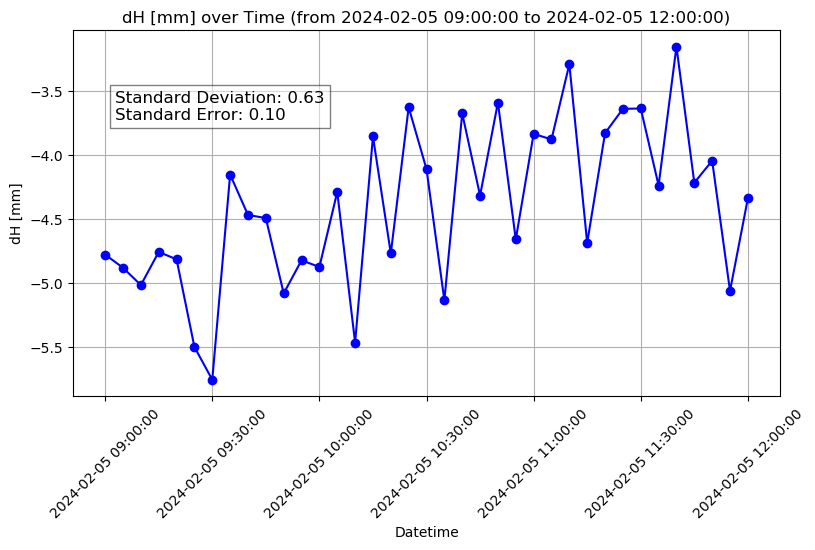

Plot saved as path_to_output_directory/plots\dH_mm_over_Time_(from_2024-02-05_090000_to_2024-02-05_120000).png


In [ ]:


# Create a directory to save the plots
output_dir = 'path_to_output_directory/plots'  # Update with the correct path
os.makedirs(output_dir, exist_ok=True)


# Convert the datetime column to a datetime object
hydro1['datetime'] = pd.to_datetime(hydro1['datetime'])

# Define the start and end date for the time frame
start_date = pd.to_datetime('2024-02-05 09:00:00')
end_date = pd.to_datetime('2024-02-05 12:00:00')

# Filter the DataFrame for the specified time frame
filtered_hydro1 = hydro1[(hydro1['datetime'] >= start_date) & (hydro1['datetime'] <= end_date)]

# Calculate standard deviation and standard error
std_dev = np.std(filtered_hydro1['dH [mm]'])
std_error = std_dev / np.sqrt(len(filtered_hydro1['dH [mm]']))

# Plot 'dH [mm]' against 'datetime' for the filtered data
plt.figure(figsize=(8, 5))
plt.plot(filtered_hydro1['datetime'], filtered_hydro1['dH [mm]'], marker='o', linestyle='-', color='blue')
title = 'dH [mm] over Time (from 2024-02-05 09:00:00 to 2024-02-05 12:00:00)'
plt.title(title)
plt.xlabel('Datetime')
plt.ylabel('dH [mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Format the x-axis to show the full datetime
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error
textstr = f'Standard Deviation: {std_dev:.2f}\nStandard Error: {std_error:.2f}'
plt.gcf().text(0.15, 0.75, textstr, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Replace spaces and special characters in the title to create a valid filename
filename = title.replace(' ', '_').replace('[', '').replace(']', '').replace(':', '').replace('/', '') + '.png'
output_file = os.path.join(output_dir, filename)

# Save the plot
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()

print(f"Plot saved as {output_file}")


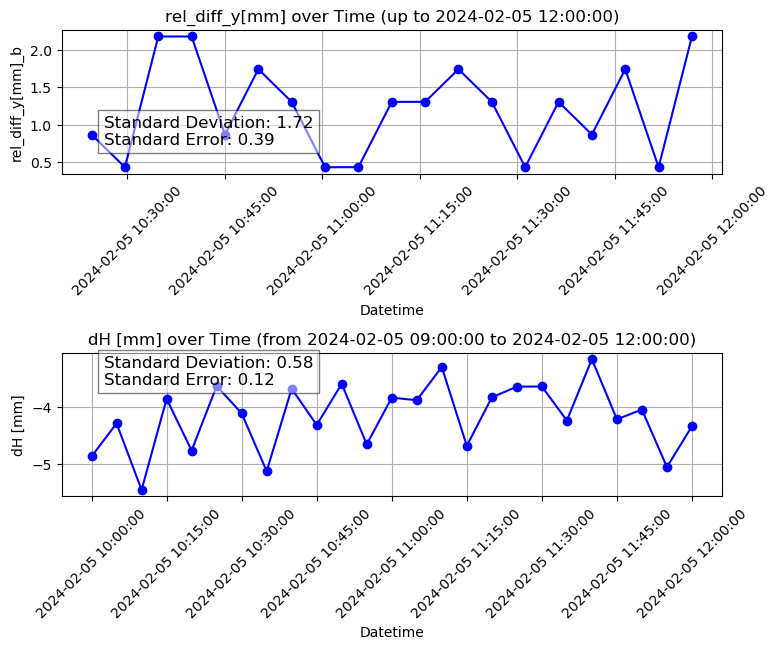

Combined plot saved as path_to_output_directory/plots/combined_plot_up_to_2024-02-05_12_00_00.png


In [ ]:

# Create a directory to save the plots
output_dir = 'path_to_output_directory/plots/'  # Update with the correct path
os.makedirs(output_dir, exist_ok=True)



# Convert the datetime columns to datetime objects
det_circ['datetime'] = pd.to_datetime(det_circ['datetime'])
hydro1['datetime'] = pd.to_datetime(hydro1['datetime'])

# Plot 1: Filter the dataframe to include only data up to 2024-02-05 12:00:00
end_date_plot1 = pd.to_datetime('2024-02-05 12:00:00')
filtered_data_plot1 = det_circ[det_circ['datetime'] <= end_date_plot1]

# Calculate standard deviation and standard error for plot 1
std_dev_plot1 = np.std(filtered_data_plot1['rel_diff_y[mm]'])
std_error_plot1 = std_dev_plot1 / np.sqrt(len(filtered_data_plot1['rel_diff_y[mm]']))

# Plot 2: Filter the DataFrame for the specified time frame
start_date_plot2 = pd.to_datetime('2024-02-05 10:00:00')
end_date_plot2 = pd.to_datetime('2024-02-05 12:00:00')
filtered_data_plot2 = hydro1[(hydro1['datetime'] >= start_date_plot2) & (hydro1['datetime'] <= end_date_plot2)]

# Calculate standard deviation and standard error for plot 2
std_dev_plot2 = np.std(filtered_data_plot2['dH [mm]'])
std_error_plot2 = std_dev_plot2 / np.sqrt(len(filtered_data_plot2['dH [mm]']))

# Create a figure for combined plots
plt.figure(figsize=(8, 6))

# Plot 1: 'rel_diff_x[mm]' against 'datetime'
plt.subplot(2, 1, 1)
plt.plot(filtered_data_plot1['datetime'], filtered_data_plot1['rel_diff_x[mm]'], marker='o', linestyle='-', color='blue')
title1 = 'rel_diff_y[mm] over Time (up to 2024-02-05 12:00:00)'
plt.title(title1)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_y[mm]_b')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error for plot 1
textstr1 = f'Standard Deviation: {std_dev_plot1:.2f}\nStandard Error: {std_error_plot1:.2f}'
plt.gcf().text(0.15, 0.75, textstr1, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Plot 2: 'dH [mm]' against 'datetime'
plt.subplot(2, 1, 2)
plt.plot(filtered_data_plot2['datetime'], filtered_data_plot2['dH [mm]'], marker='o', linestyle='-', color='blue')
title2 = 'dH [mm] over Time (from 2024-02-05 09:00:00 to 2024-02-05 12:00:00)'
plt.title(title2)
plt.xlabel('Datetime')
plt.ylabel('dH [mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error for plot 2
textstr2 = f'Standard Deviation: {std_dev_plot2:.2f}\nStandard Error: {std_error_plot2:.2f}'
plt.gcf().text(0.15, 0.35, textstr2, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Save the combined plot
filename_combined = 'combined_plot_up_to_2024-02-05_12_00_00.png'
output_file_combined = os.path.join(output_dir, filename_combined)
plt.savefig(output_file_combined, dpi=300)

# Show the combined plot
plt.show()

print(f"Combined plot saved as {output_file_combined}")


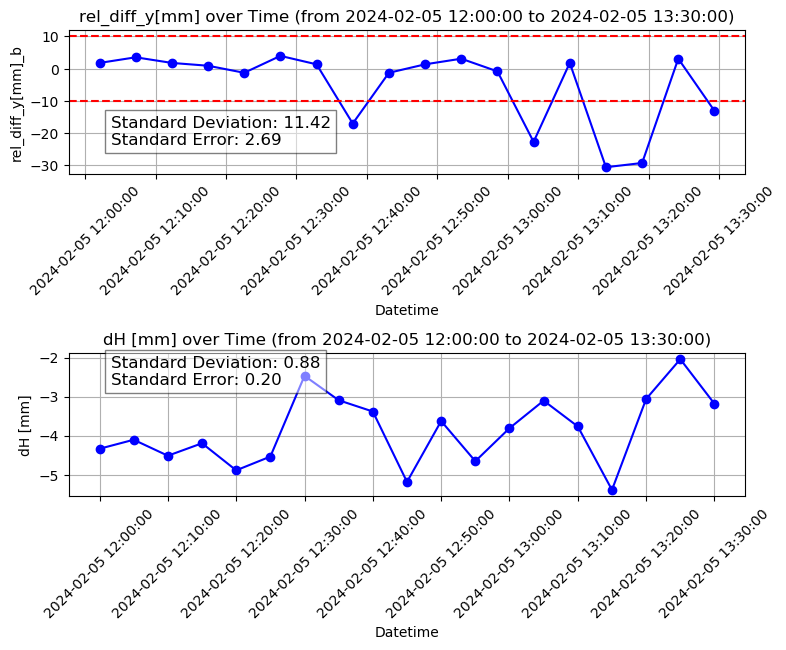

Combined plot saved as path_to_output_directory/plots/combined_plot_from_2024-02-05_12_00_00_to_2024-02-05_13_30_00.png


In [ ]:

# Create a directory to save the plots
output_dir = 'path_to_output_directory/plots/'  # Update with the correct path
os.makedirs(output_dir, exist_ok=True)


# Convert the datetime columns to datetime objects
det_circ['datetime'] = pd.to_datetime(det_circ['datetime'])
hydro1['datetime'] = pd.to_datetime(hydro1['datetime'])

# Define the start and end date for the time frame
start_date = pd.to_datetime('2024-02-05 12:00:00')
end_date = pd.to_datetime('2024-02-05 13:30:00')

# Filter the dataframes for the specified time frame
filtered_data_det_circ = det_circ[(det_circ['datetime'] >= start_date) & (det_circ['datetime'] <= end_date)]
filtered_data_hydro1 = hydro1[(hydro1['datetime'] >= start_date) & (hydro1['datetime'] <= end_date)]

# Calculate standard deviation and standard error for det_circ
std_dev_det_circ = np.std(filtered_data_det_circ['rel_diff_y[mm]'])
std_error_det_circ = std_dev_det_circ / np.sqrt(len(filtered_data_det_circ['rel_diff_y[mm]']))

# Calculate standard deviation and standard error for hydro1
std_dev_hydro1 = np.std(filtered_data_hydro1['dH [mm]'])
std_error_hydro1 = std_dev_hydro1 / np.sqrt(len(filtered_data_hydro1['dH [mm]']))

# Create a figure for subplots
plt.figure(figsize=(8, 6))

# Subplot 1: rel_diff_x[mm] against datetime for det_circ
plt.subplot(2, 1, 1)
plt.plot(filtered_data_det_circ['datetime'], filtered_data_det_circ['rel_diff_y[mm]'], marker='o', linestyle='-', color='blue')
plt.axhline(y=-10, color='red', linestyle='--')
plt.axhline(y=10, color='red', linestyle='--')
title1 = 'rel_diff_y[mm] over Time (from 2024-02-05 12:00:00 to 2024-02-05 13:30:00)'
plt.title(title1)
plt.xlabel('Datetime')
plt.ylabel('rel_diff_y[mm]_b')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error for det_circ
textstr1 = f'Standard Deviation: {std_dev_det_circ:.2f}\nStandard Error: {std_error_det_circ:.2f}'
plt.gcf().text(0.15, 0.75, textstr1, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Subplot 2: dH [mm] against datetime for hydro1
plt.subplot(2, 1, 2)
plt.plot(filtered_data_hydro1['datetime'], filtered_data_hydro1['dH [mm]'], marker='o', linestyle='-', color='blue')
title2 = 'dH [mm] over Time (from 2024-02-05 12:00:00 to 2024-02-05 13:30:00)'
plt.title(title2)
plt.xlabel('Datetime')
plt.ylabel('dH [mm]')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

# Add text box for standard deviation and standard error for hydro1
textstr2 = f'Standard Deviation: {std_dev_hydro1:.2f}\nStandard Error: {std_error_hydro1:.2f}'
plt.gcf().text(0.15, 0.35, textstr2, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Save the combined plot
filename_combined = 'combined_plot_from_2024-02-05_12_00_00_to_2024-02-05_13_30_00.png'
output_file_combined = os.path.join(output_dir, filename_combined)
plt.savefig(output_file_combined, dpi=300)

# Show the combined plot
plt.show()

print(f"Combined plot saved as {output_file_combined}")


In [ ]:
# Image data
data = pd.read_excel("new_data/new_data/updated_right_bulb_centres (1)1111.xlsx")
data["time"] = data["datetime"].dt.strftime('%d%H%M').astype(int)
# print(data.head(5))
data_np = data[["time","rel_diff_y[mm]"]].to_numpy()
print(data_np.shape)

(67, 2)


In [ ]:
# Hydro data
data_hd = pd.read_excel("new_data/new_data/hydro.xlsx")
data_hd["datetime"] = data_hd["datetime"].astype("datetime64[ns]")
data_hd["time"] = data_hd["datetime"].dt.strftime('%d%H%M').astype(int)
data_hd_np = data_hd[["time","dH [mm]"]].to_numpy()
print(data_hd_np.shape)

(71, 2)


In [ ]:
print(data_np[0])
print(data_np[1])

[ 5.10240000e+04 -3.81768205e-01]
[5.10290000e+04 5.53287253e-02]


In [ ]:
def interpolate_data(data):
    interpolate_data = np.zeros((1,data.shape[1]))

    for i in range(data.shape[0]-1):
        val_i = data[i] # timestamp 0
        val_ii = data[i+1] # timestamp 1

        diff_pi_pii = val_ii - val_i #difference in value [time, value]

        interpolate_value = np.linspace(val_i[1], val_ii[1], int(diff_pi_pii[0]),endpoint=False).reshape(-1, 1)
        interpolate_time = np.linspace(val_i[0], val_ii[0], int(diff_pi_pii[0]),endpoint=False).reshape(-1, 1)
        
        inter_data  = np.hstack([interpolate_time,interpolate_value])
        interpolate_data  = np.vstack([interpolate_data,inter_data])
    
    return interpolate_data[1:,:]

In [ ]:
data_img_int = interpolate_data(data_np)
data_hyd_int = interpolate_data(data_hd_np)

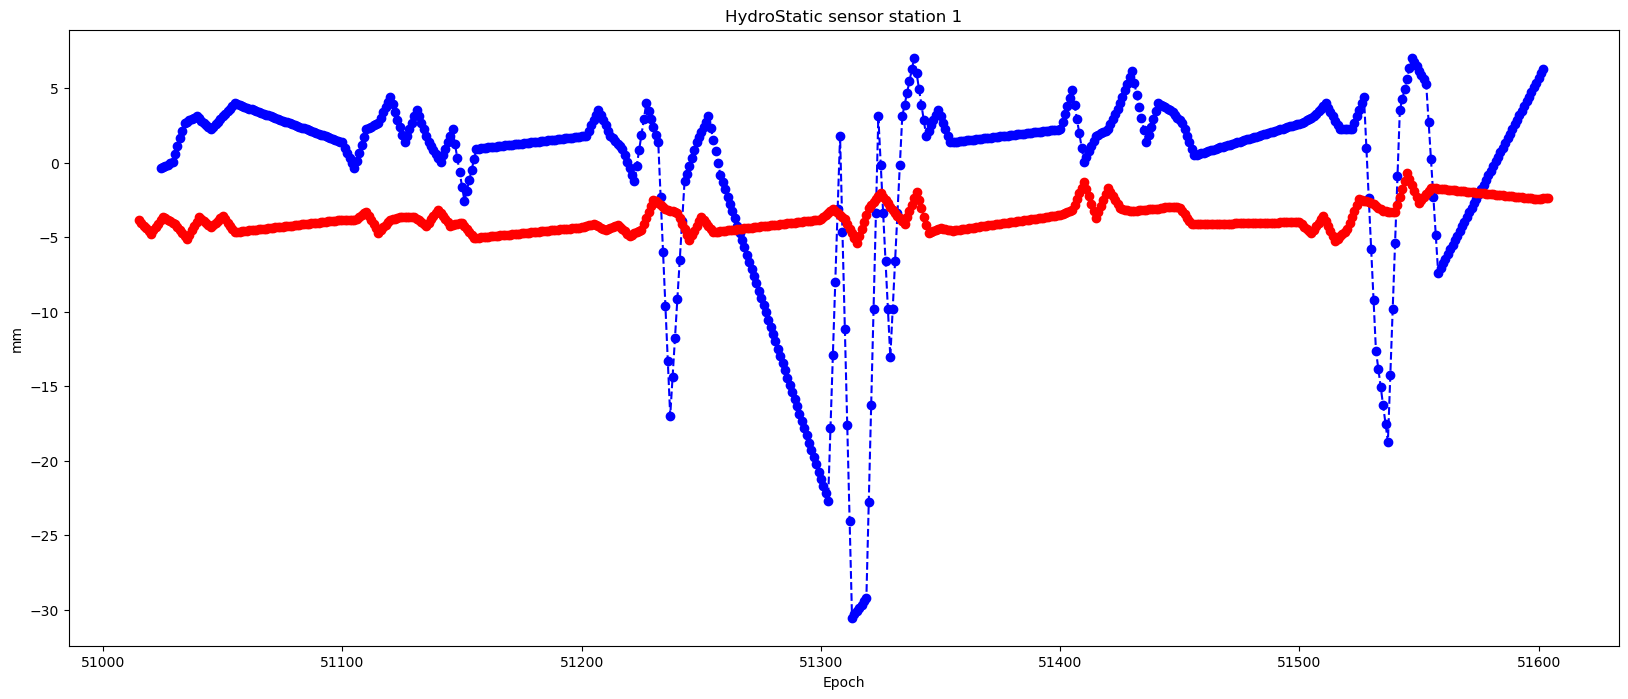

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data_img_int[:,0],data_img_int[:,1],'--ob')
plt.plot(data_hyd_int[:,0],data_hyd_int[:,1],'--or')
plt.title("HydroStatic sensor station 1")
plt.ylabel("mm")
plt.xlabel("Epoch")
plt.show()

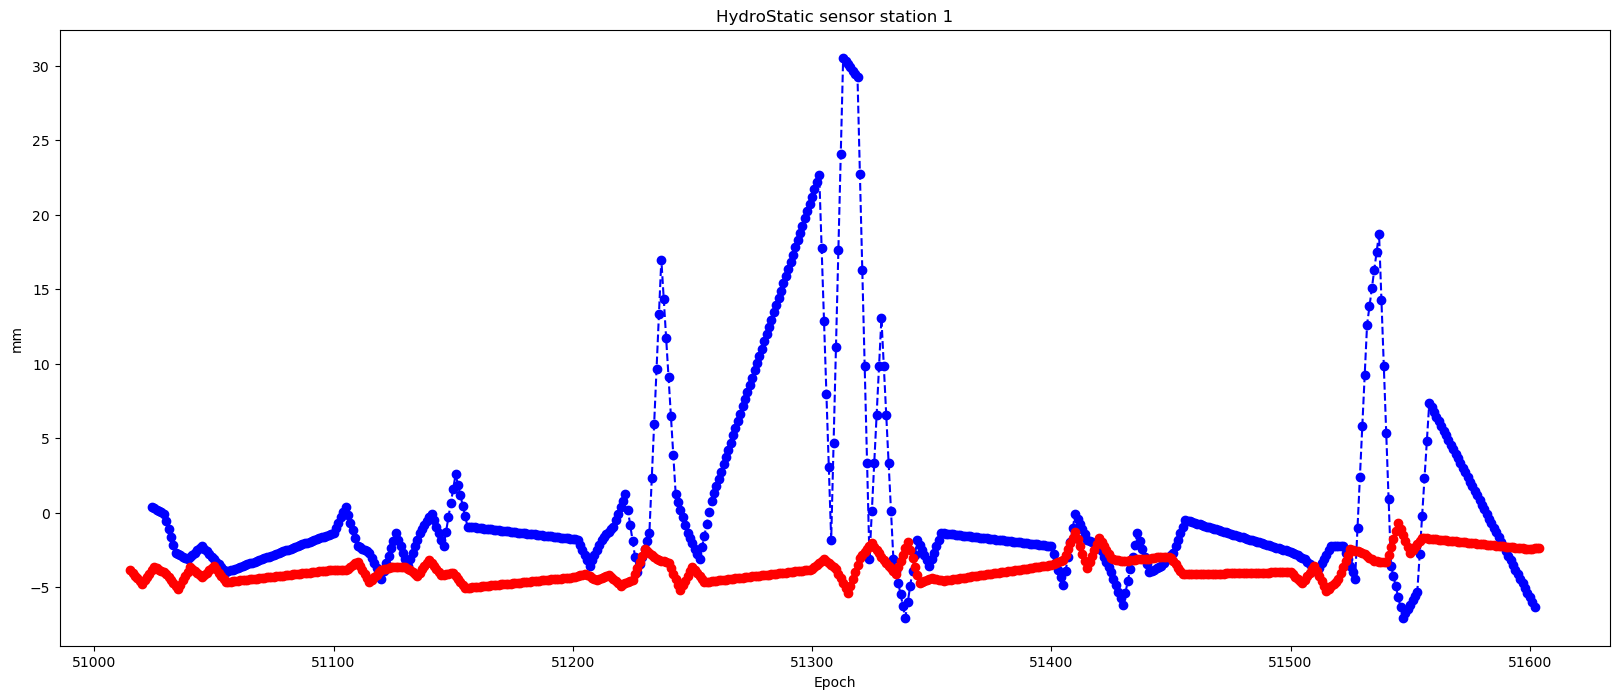

In [ ]:
#rotating the detected images data
plt.figure(figsize=(20,8))
plt.plot(data_img_int[:,0],-data_img_int[:,1],'--ob')
plt.plot(data_hyd_int[:,0],data_hyd_int[:,1],'--or')
plt.title("HydroStatic sensor station 1")
plt.ylabel("mm")
plt.xlabel("Epoch")
plt.show()

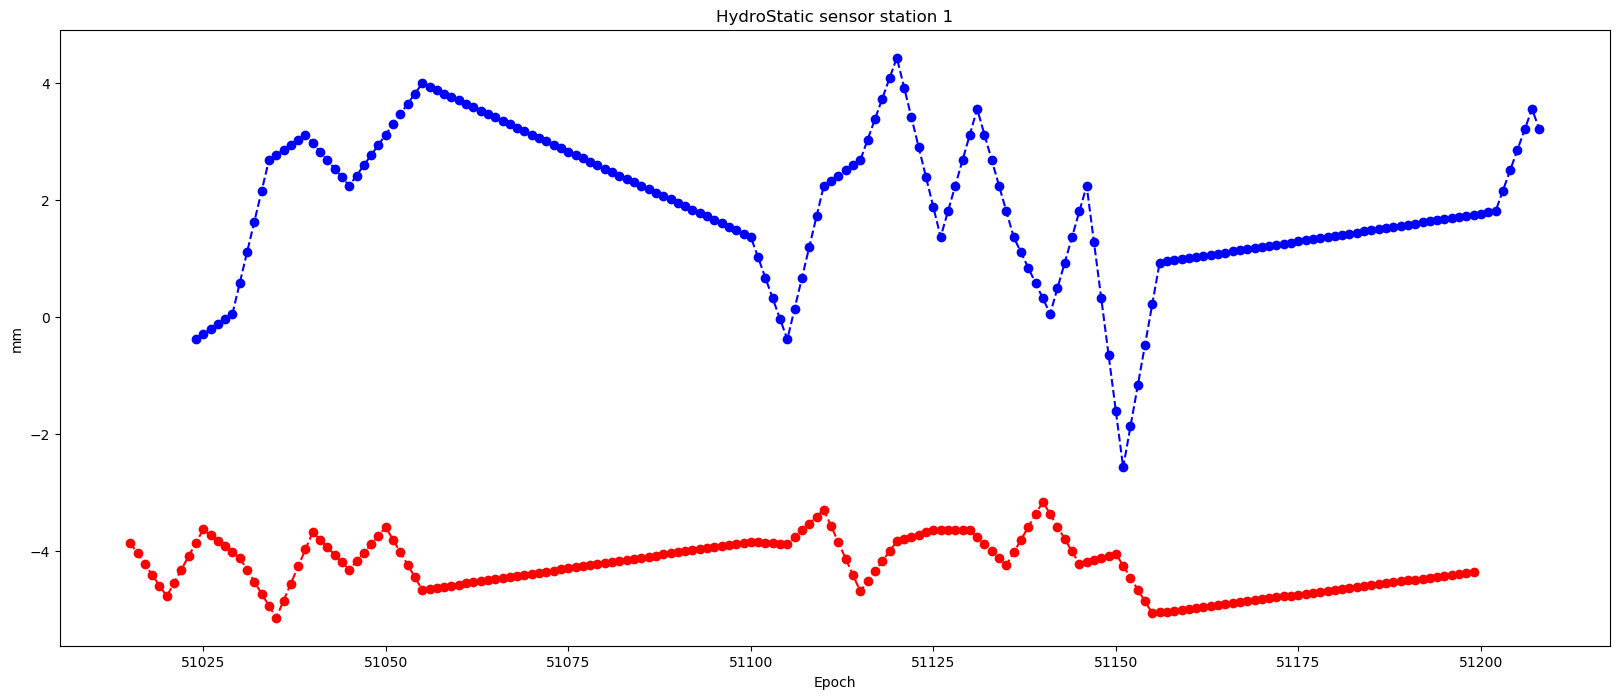

In [ ]:
#Plotting within the timespace and not negating the detected image data


time = 51200.0
timestamp = np.argwhere(data_hyd_int[:,0]==time)[0][0]

plt.figure(figsize=(20,8))
plt.plot(data_img_int[:timestamp,0],data_img_int[:timestamp,1],'--ob')
plt.plot(data_hyd_int[:timestamp,0],data_hyd_int[:timestamp,1],'--or')
plt.title("HydroStatic sensor station 1")
plt.ylabel("mm")
plt.xlabel("Epoch")
plt.show()

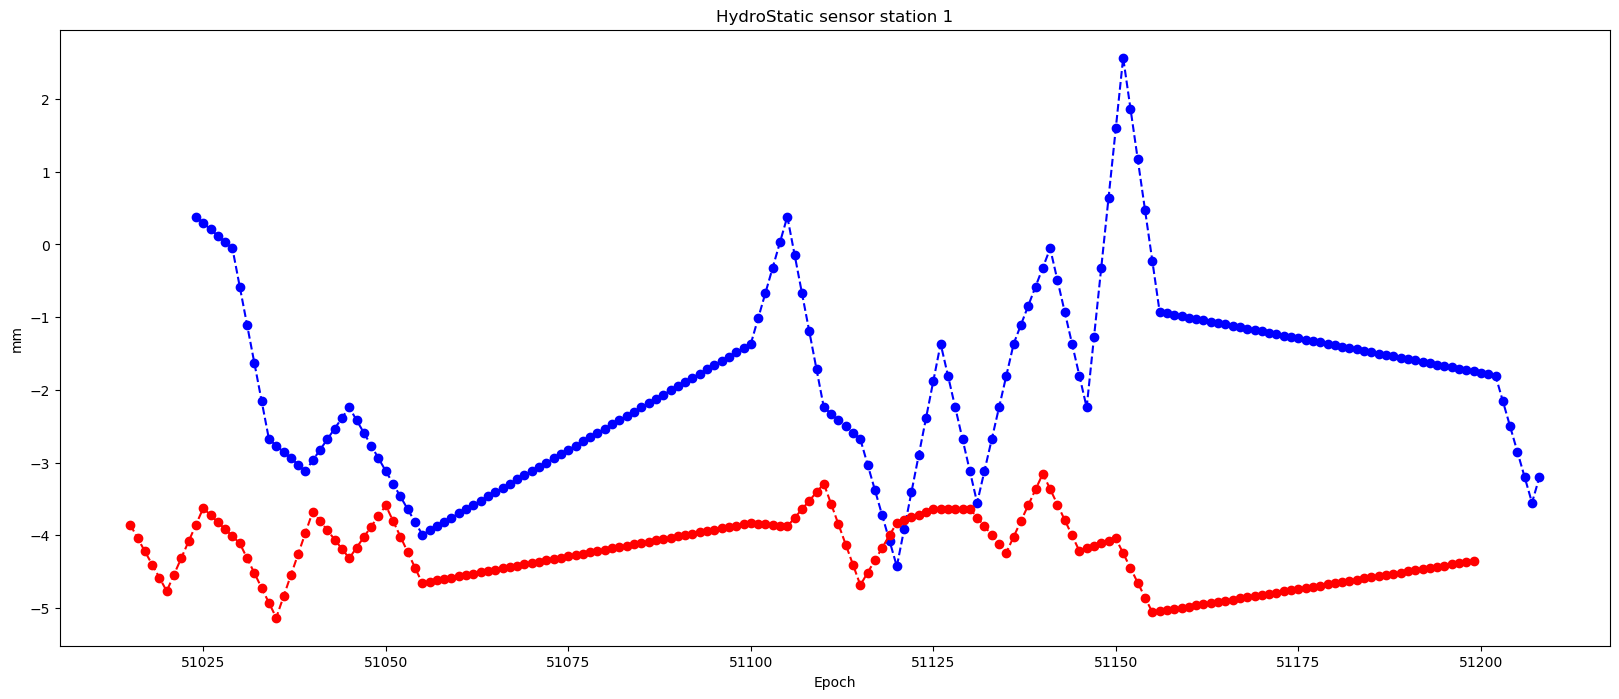

In [ ]:
#Plotting within the timespace and negating the detected image data

time = 51200.0
timestamp = np.argwhere(data_hyd_int[:,0]==time)[0][0]

plt.figure(figsize=(20,8))
plt.plot(data_img_int[:timestamp,0],-data_img_int[:timestamp,1],'--ob')
plt.plot(data_hyd_int[:timestamp,0],data_hyd_int[:timestamp,1],'--or')
plt.title("HydroStatic sensor station 1")
plt.ylabel("mm")
plt.xlabel("Epoch")
plt.show()

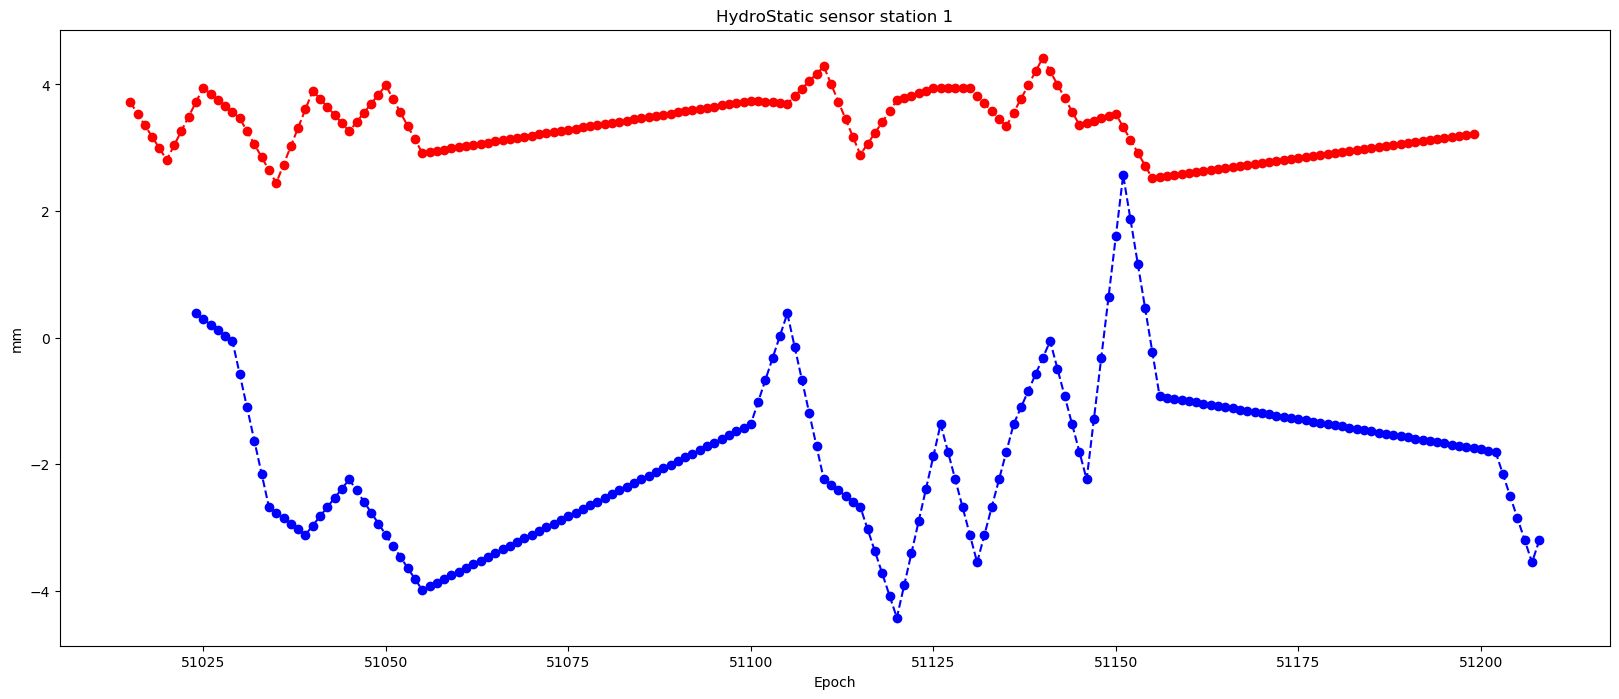

In [ ]:
#overlaying them on eachother

time = 51200.0
timestamp = np.argwhere(data_hyd_int[:,0]==time)[0][0]
data_img_ts = data_img_int[:timestamp,:]
data_hyd_ts = data_hyd_int[:timestamp,:]

mean_diff = np.abs(np.mean(data_hyd_ts))-np.abs(np.mean(data_img_ts))

plt.figure(figsize=(20,8))
plt.plot(data_img_ts[:,0],-data_img_ts[:,1],'--ob')
plt.plot(data_hyd_ts[:,0],data_hyd_ts[:,1]-mean_diff,'--or')
plt.title("HydroStatic sensor station 1")
plt.ylabel("mm")
plt.xlabel("Epoch")
plt.show()


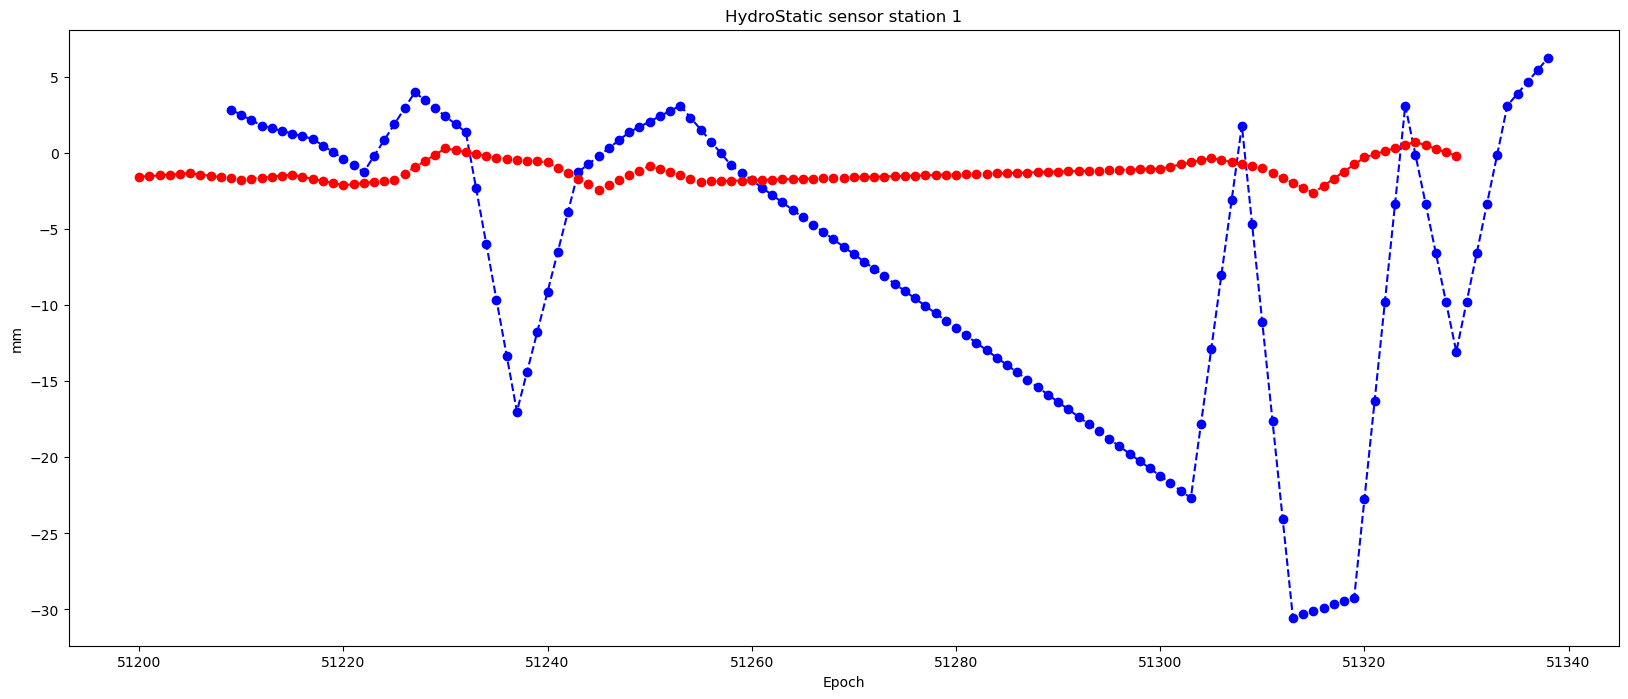

In [ ]:
#Plotting within the timespace and not negating the detected image data
#overlaying them on eachother

start_time = 51200.0
end_time = 51330.0

timestamp_s = np.argwhere(data_hyd_int[:,0]==start_time)[0][0]
timestamp_e = np.argwhere(data_hyd_int[:,0]==end_time)[0][0]

data_img_ts = data_img_int[timestamp_s:timestamp_e,:]
data_hyd_ts = data_hyd_int[timestamp_s:timestamp_e,:]

mean_diff = np.abs(np.mean(data_hyd_ts))-np.abs(np.mean(data_img_ts))

plt.figure(figsize=(20,8))
plt.plot(data_img_ts[:,0],data_img_ts[:,1],'--ob')
plt.plot(data_hyd_ts[:,0],data_hyd_ts[:,1]-mean_diff,'--or')
plt.title("HydroStatic sensor station 1")
plt.ylabel("mm")
plt.xlabel("Epoch")
plt.show()

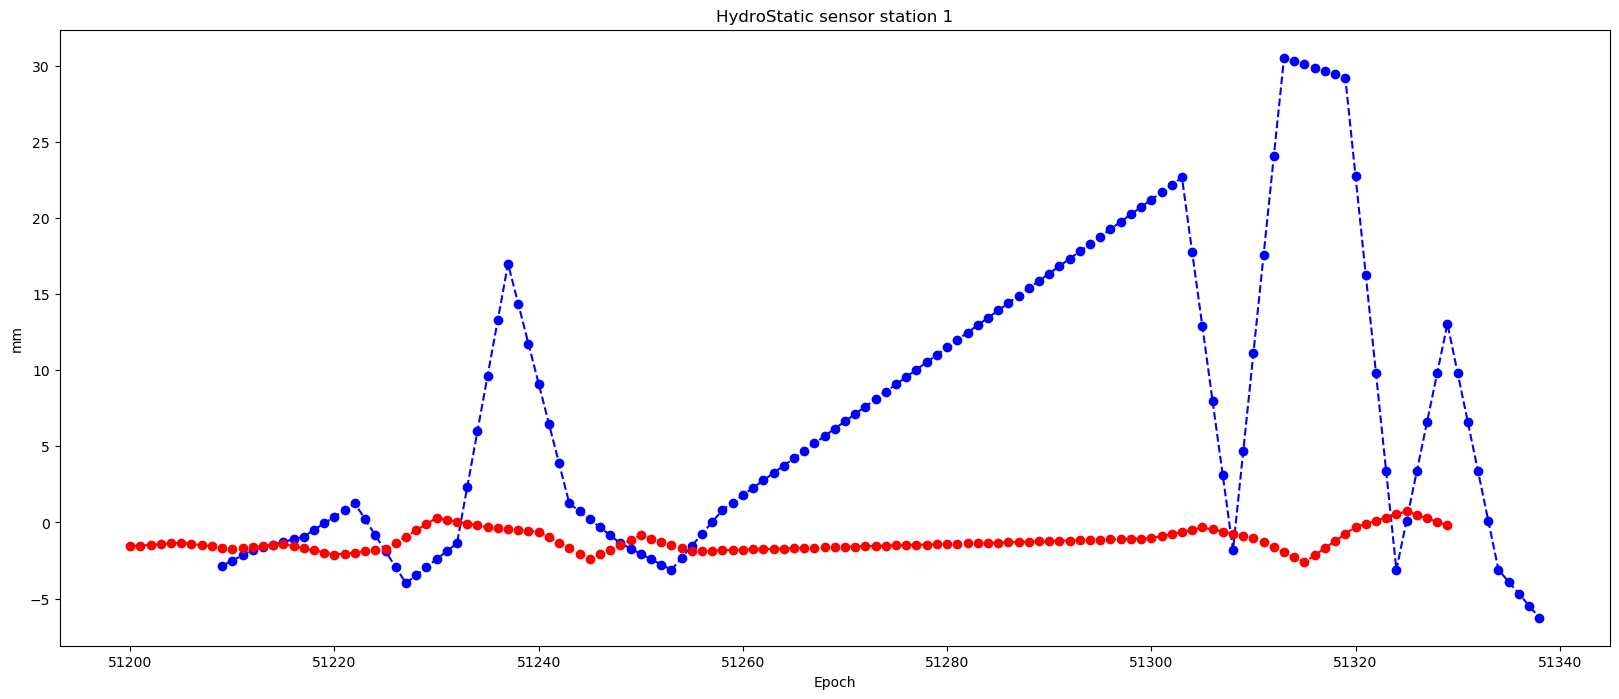

In [ ]:
#Plotting within the timespace and negating the detected image data
#overlaying them on eachother

start_time = 51200.0
end_time = 51330.0

timestamp_s = np.argwhere(data_hyd_int[:,0]==start_time)[0][0]
timestamp_e = np.argwhere(data_hyd_int[:,0]==end_time)[0][0]

data_img_ts = data_img_int[timestamp_s:timestamp_e,:]
data_hyd_ts = data_hyd_int[timestamp_s:timestamp_e,:]

mean_diff = np.abs(np.mean(data_hyd_ts))-np.abs(np.mean(data_img_ts))

plt.figure(figsize=(20,8))
plt.plot(data_img_ts[:,0],-data_img_ts[:,1],'--ob')
plt.plot(data_hyd_ts[:,0],data_hyd_ts[:,1]-mean_diff,'--or')
plt.title("HydroStatic sensor station 1")
plt.ylabel("mm")
plt.xlabel("Epoch")
plt.show()

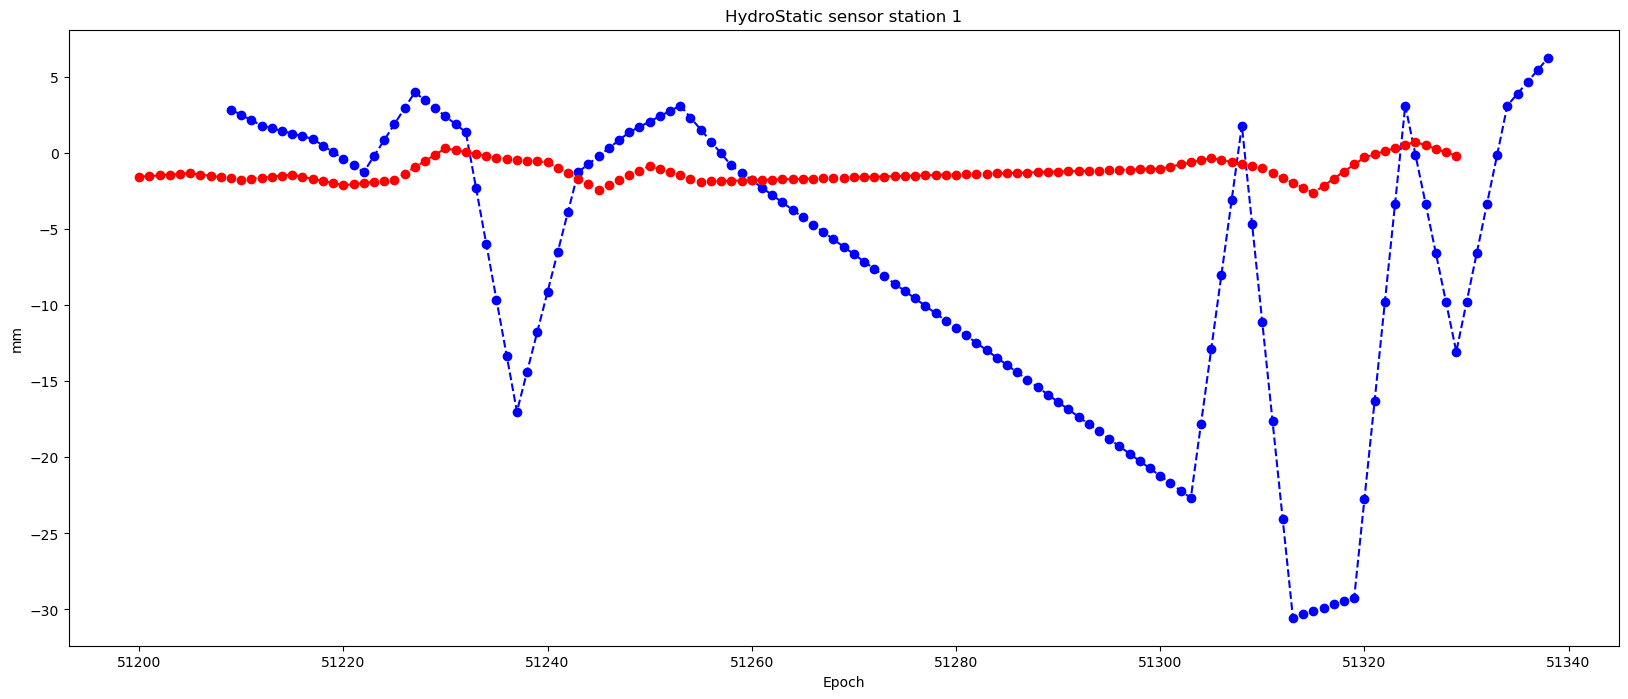

In [ ]:
#Plotting within the timespace and not negating the detected image data
#overlaying them on eachother

start_time = 51200.0
end_time = 51330.0

timestamp_s = np.argwhere(data_hyd_int[:,0]==start_time)[0][0]
timestamp_e = np.argwhere(data_hyd_int[:,0]==end_time)[0][0]

data_img_ts = data_img_int[timestamp_s:timestamp_e,:]
data_hyd_ts = data_hyd_int[timestamp_s:timestamp_e,:]

mean_diff = np.abs(np.mean(data_hyd_ts))-np.abs(np.mean(data_img_ts))

plt.figure(figsize=(20,8))
plt.plot(data_img_ts[:,0],data_img_ts[:,1],'--ob')
plt.plot(data_hyd_ts[:,0],data_hyd_ts[:,1]-mean_diff,'--or')
plt.title("HydroStatic sensor station 1")
plt.ylabel("mm")
plt.xlabel("Epoch")
plt.show()

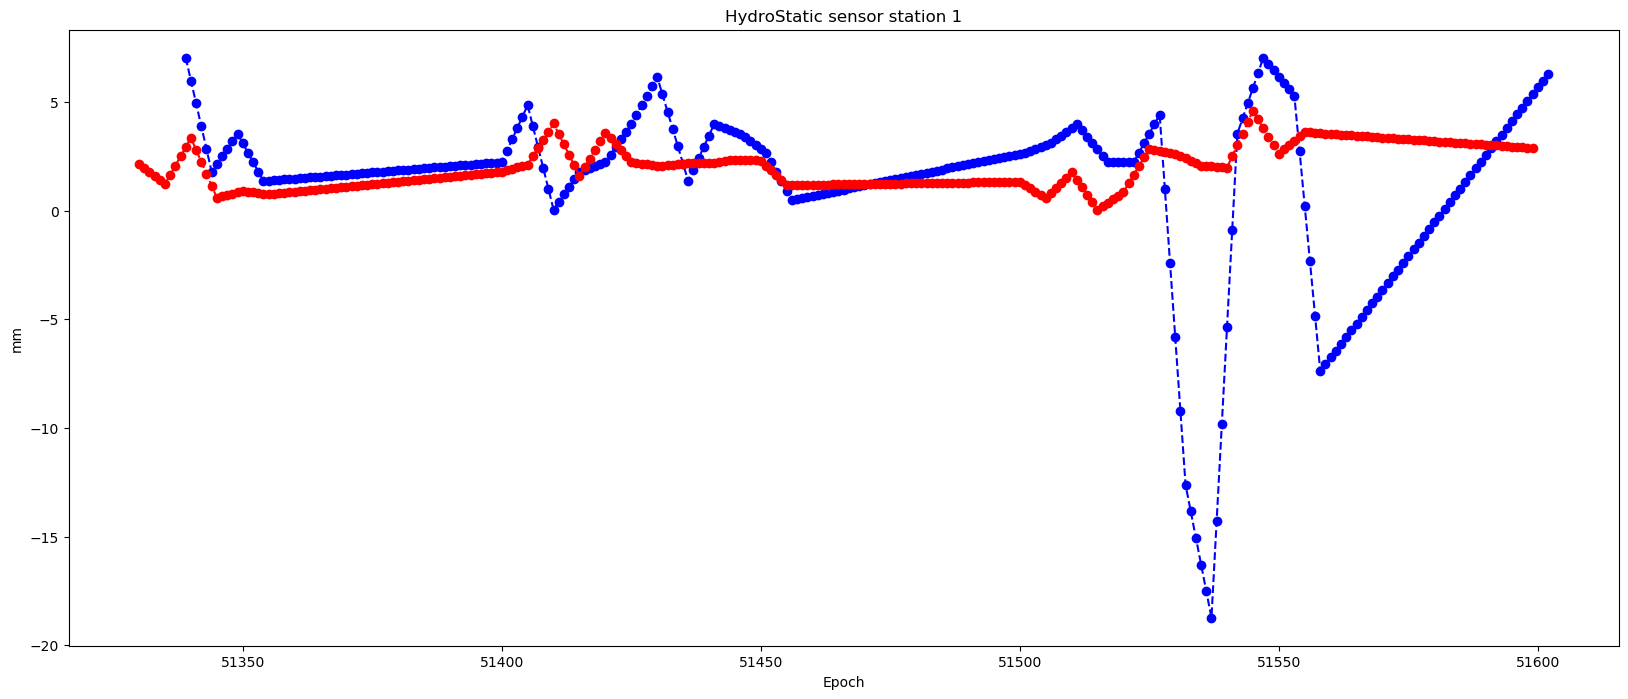

In [ ]:
#Plotting within the timespace and  not negating the detected image data


start_time = 51330.0
end_time = 51600.0

timestamp_s = np.argwhere(data_hyd_int[:,0]==start_time)[0][0]
timestamp_e = np.argwhere(data_hyd_int[:,0]==end_time)[0][0]

data_img_ts = data_img_int[timestamp_s:timestamp_e,:]
data_hyd_ts = data_hyd_int[timestamp_s:timestamp_e,:]

mean_diff = np.abs(np.mean(data_hyd_ts))-np.abs(np.mean(data_img_ts))

plt.figure(figsize=(20,8))
plt.plot(data_img_ts[:,0],data_img_ts[:,1],'--ob')
plt.plot(data_hyd_ts[:,0],data_hyd_ts[:,1]-mean_diff,'--or')
plt.title("HydroStatic sensor station 1")
plt.ylabel("mm")
plt.xlabel("Epoch")
plt.show()

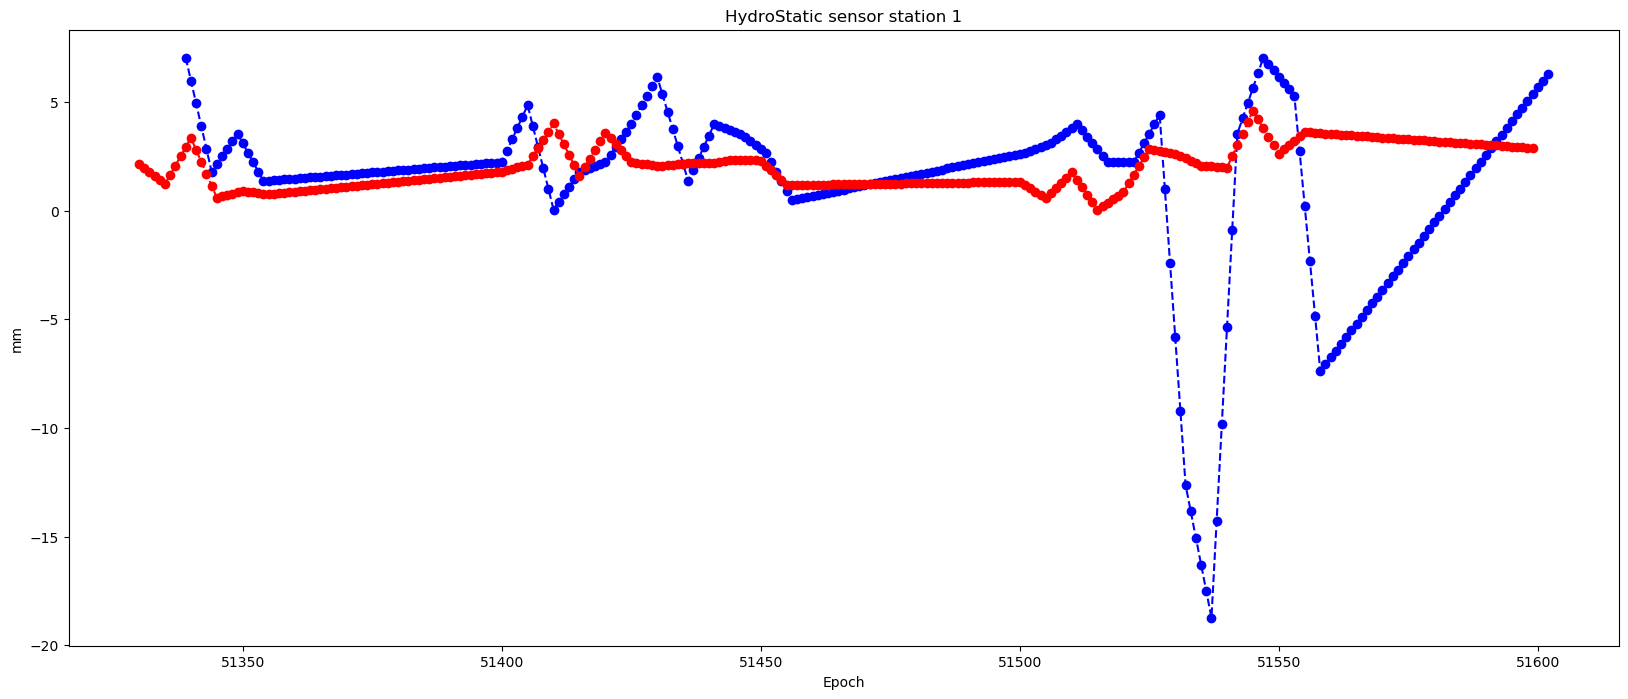

In [ ]:
#Plotting within the timespace and not negating the detected image data
#overlaying them on eachother


start_time = 51330.0
end_time = 51600.0

timestamp_s = np.argwhere(data_hyd_int[:,0]==start_time)[0][0]
timestamp_e = np.argwhere(data_hyd_int[:,0]==end_time)[0][0]

data_img_ts = data_img_int[timestamp_s:timestamp_e,:]
data_hyd_ts = data_hyd_int[timestamp_s:timestamp_e,:]

mean_diff = np.abs(np.mean(data_hyd_ts))-np.abs(np.mean(data_img_ts))

plt.figure(figsize=(20,8))
plt.plot(data_img_ts[:,0],data_img_ts[:,1],'--ob')
plt.plot(data_hyd_ts[:,0],data_hyd_ts[:,1]-mean_diff,'--or')
plt.title("HydroStatic sensor station 1")
plt.ylabel("mm")
plt.xlabel("Epoch")
plt.show()